<a href="https://colab.research.google.com/github/dsdeegalla/PhD/blob/main/Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mounting Google Driven
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!ls -l /content/gdrive/'My Drive'/'Colab Notebooks'/datasets/AI/*.csv

-rw------- 1 root root 141484 Jan 28  2020 '/content/gdrive/My Drive/Colab Notebooks/datasets/AI/AI.csv'


In [ ]:
!find /content/gdrive/'My Drive'/'Colab Notebooks'/datasets/  -printf "%f\n"

In [ ]:
# Import Data
import pandas as pd

data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/AI.csv', names=['ecfi'+str(i) for i in range(1,1025)]+['CLASS'])

#print(data)
data.head()

,ecfi1,ecfi2,ecfi3,ecfi4,ecfi5,ecfi6,ecfi7,ecfi8,ecfi9,ecfi10,...,ecfi1016,ecfi1017,ecfi1018,ecfi1019,ecfi1020,ecfi1021,ecfi1022,ecfi1023,ecfi1024,CLASS
0,1,1,1,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,1,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,1,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,1,1,1,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,1,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier, KDTree, BallTree#, CoverTree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate high-dimensional data
X, y = make_classification(n_samples=1000, n_features=100, n_classes=2)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=50)
X_reduced = pca.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2)

# Fit kNN classifier with simple distance metric on the reduced data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Simple kNN Accuracy:", accuracy)

# Fit kNN classifier with kd-tree on the reduced data
kdt = KDTree(X_train)
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', leaf_size=30, metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("kd-tree kNN Accuracy:", accuracy)

# Fit kNN classifier with ball-tree on the reduced data
bt = BallTree(X_train)
knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', leaf_size=30, metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("ball-tree kNN Accuracy:", accuracy)

# Fit kNN classifier with cover-tree on the reduced data
#ct = CoverTree(X_train)
#knn = KNeighborsClassifier(n_neighbors=5, algorithm='cover_tree', metric='minkowski')
#knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
#accuracy = accuracy_score(y_test, y_pred)
#print("cover-tree kNN Accuracy:", accuracy)


Simple kNN Accuracy: 0.765
kd-tree kNN Accuracy: 0.765
ball-tree kNN Accuracy: 0.765


In [ ]:
import pandas as pd
from sklearn import neighbors
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import time

dfraw = pd.DataFrame(columns=['DataSet','rawMean','rawStd'])
for filename in ['centralnervous','AI','outex']: #,'colontumor','leukemia','prostate','brain','lymphoma','nci60','srbct']:
  data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
  X = data.iloc[:,:-1]
  y = data.iloc[:,-1]
  scaler = Normalizer().fit(X)
  normalizedX = scaler.transform(X)

  start_time = time.time()
  clf = neighbors.KNeighborsClassifier()
  skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
  scores = cross_val_score(clf, normalizedX, y, cv=skf)
  end_time = time.time()
  total_time = end_time - start_time

  # Fit kNN classifier with kd-tree
  start_time2 = time.time()
  kdt = KDTree(normalizedX)
  clf2 = KNeighborsClassifier(algorithm='kd_tree')
  scores2 = cross_val_score(clf2, normalizedX, y, cv=skf)
  end_time2 = time.time()
  total_time2 = end_time2 - start_time2

  dfraw = dfraw.append({'DataSet':filename,'rawMean':scores.mean()*100.0,'rawStd':scores.std()*100.0,'rawTime':total_time,'rawKDMean':scores2.mean()*100.0,'rawKDStd':scores2.std()*100.0,'rawKDTime':total_time2},ignore_index=True)

#print("kd-tree kNN Accuracy:", accuracy)

In [ ]:
dfraw

,DataSet,rawMean,rawStd,rawKDMean,rawKDStd,rawKDTime,rawTime
0,centralnervous,58.333333,7.453560,58.333333,7.453560,0.110690,0.063196
1,AI,87.142857,9.476071,87.142857,9.476071,0.027752,0.033535
2,outex,6.617647,1.395122,6.617647,1.395122,0.833029,0.078375


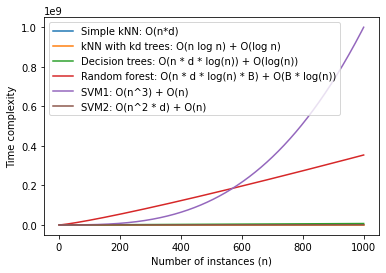

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = np.linspace(1, 1000, 1000)
d = 1024 # number of features
B = 50 # number of trees in decision trees

# O(n*d) # n - number of instances d - number of features
y1 = n * d

# O(n log n) + O(log n) # kd-tree/ball-tree
y2 = n * np.log(n) + np.log(n)

# O(n * d * log(n)) + O(log(n))
y3 = n * d * np.log(n) + np.log(n)

# O(n * d * log(n) * B) + O(B * log(n))
y4 = n * d * np.log(n) * B + B * np.log(n)

# O(n^3) + O(n)
y5 = n ** 3 + n

# O(n^2 * d) + O(n)
y6 = n ** 2 + n

plt.plot(n, y1, label='Simple kNN: O(n*d)')
plt.plot(n, y2, label='kNN with kd trees: O(n log n) + O(log n)')
plt.plot(n, y3, label='Decision trees: O(n * d * log(n)) + O(log(n))')
plt.plot(n, y4, label='Random forest: O(n * d * log(n) * B) + O(B * log(n))')
plt.plot(n, y5, label='SVM1: O(n^3) + O(n)')
plt.plot(n, y6, label='SVM2: O(n^2 * d) + O(n)')

plt.xlabel('Number of instances (n)')
plt.ylabel('Time complexity')
plt.legend()
plt.show()

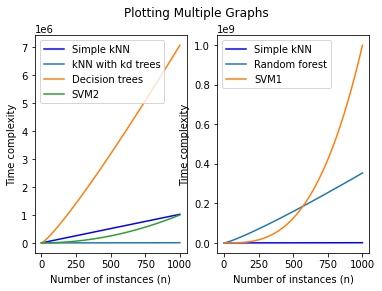

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = np.linspace(1, 1000, 1000)
d = 1024 # number of features
B = 50 # number of trees in decision trees

# O(n*d) # n - number of instances d - number of features
y1 = n * d

# O(n log n) + O(log n) # kd-tree/ball-tree
y2 = n * np.log(n) + np.log(n)

# O(n * d * log(n)) + O(log(n))
y3 = n * d * np.log(n) + np.log(n)

# O(n * d * log(n) * B) + O(B * log(n))
y4 = n * d * np.log(n) * B + B * np.log(n)

# O(n^3) + O(n)
y5 = n ** 3 + n

# O(n^2 * d) + O(n)
y6 = n ** 2 + n

'''
plt.plot(n, y1, label='Simple kNN: O(n*d)')
plt.plot(n, y2, label='kNN with kd trees: O(n log n) + O(log n)')
plt.plot(n, y3, label='Decision trees: O(n * d * log(n)) + O(log(n))')
plt.plot(n, y4, label='Random forest: O(n * d * log(n) * B) + O(B * log(n))')
plt.plot(n, y5, label='SVM1: O(n^3) + O(n)')
plt.plot(n, y6, label='SVM2: O(n^2 * d) + O(n)')
'''

plt.subplot(121)
plt.plot(n, y1, 'b-', label='Simple kNN')
plt.plot(n, y2, label='kNN with kd trees')
plt.plot(n, y3, label='Decision trees')
plt.plot(n, y6, label='SVM2')
plt.legend()
plt.xlabel('Number of instances (n)')
plt.ylabel('Time complexity')

plt.subplot(122)
plt.plot(n, y1, 'b-', label='Simple kNN')
plt.plot(n, y4, label='Random forest')
plt.plot(n, y5, label='SVM1')
#plt.plot(n, y6, label='SVM2: O(n^2 * d) + O(n)')
plt.legend()
plt.xlabel('Number of instances (n)')
plt.ylabel('Time complexity')

plt.suptitle("Plotting Multiple Graphs")

#plt.xlabel('Number of instances (n)')
#plt.ylabel('Time complexity')
#plt.legend()
plt.show()

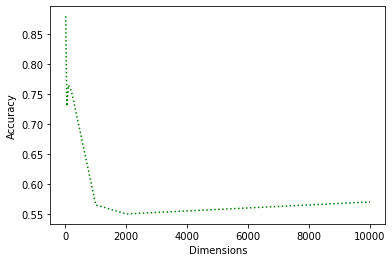

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Initialize lists to store results
accuracies = []
accuracies2 = []
dimensions = [10, 50, 100, 200, 1000, 2000, 10000]

for d in dimensions:
    # Generate dataset with d dimensions
    X, y = make_classification(n_samples=1000, n_features=d, n_classes=2)

    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Train nearest neighbor classifier with Euclidean distance
    knn = KNeighborsClassifier(metric='euclidean')
    knn.fit(X_train, y_train)

    knn2 = KNeighborsClassifier(metric='minkowski')
    knn2.fit(X_train, y_train)

    # Predict labels for test set
    y_pred = knn.predict(X_test)
    y_pred2 = knn2.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy2 = accuracy_score(y_test, y_pred2)

    # Add accuracy to list of results
    accuracies.append(accuracy)
    accuracies2.append(accuracy2)

# Plot results
#plt.plot(dimensions, accuracies, 'b-')
plt.plot(dimensions, accuracies2, 'g:')
plt.xlabel('Dimensions')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
import time

# Start the timer
start_time = time.time()

# Run kNN code here
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Stop the timer
end_time = time.time()

# Calculate the total time taken
total_time = end_time - start_time

print("Time taken:", total_time, "seconds")


centralnervous (60, 7130)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


colontumor (62, 2001)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


leukemia (38, 7130)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


prostate (102, 6034)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


brain (42, 5598)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


lymphoma (62, 4027)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


nci60 (61, 5245)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


srbct (63, 2309)
AI (69, 1025)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AMPH1 (130, 1025)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ATA (94, 1025)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


COMT (92, 1025)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


EDC (119, 1025)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


HIVPR (113, 1025)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


HIVRT (101, 1025)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


HPTP (132, 1025)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ace (114, 1025)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ache (111, 1025)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


bzr (163, 1025)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


caco (100, 1025)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


cox2 (322, 1025)


<ipython-input-5-b7c9710f2e0e>:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(n)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


cpd-mouse (980, 1025)


<ipython-input-5-b7c9710f2e0e>:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(n)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


cpd-rat (1198, 1025)


<ipython-input-5-b7c9710f2e0e>:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(n)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


gpb (66, 1025)


<ipython-input-5-b7c9710f2e0e>:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(n)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


therm (76, 1025)


<ipython-input-5-b7c9710f2e0e>:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(n)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


thr (88, 1025)


<ipython-input-5-b7c9710f2e0e>:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(n)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


outex (680, 1025)


<ipython-input-5-b7c9710f2e0e>:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(n)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


zubud (1005, 1025)


<ipython-input-5-b7c9710f2e0e>:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(n)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


mias (322, 1025)


<ipython-input-5-b7c9710f2e0e>:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(n)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


coil100 (7200, 1025)


<ipython-input-5-b7c9710f2e0e>:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(n)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


irma (9000, 1025)


<ipython-input-5-b7c9710f2e0e>:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(n)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


17flowers (1360, 1025)


<ipython-input-5-b7c9710f2e0e>:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(n)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


leedsbutterfly (832, 1025)


<ipython-input-5-b7c9710f2e0e>:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(n)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


car (1050, 1025)


<ipython-input-5-b7c9710f2e0e>:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(n)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


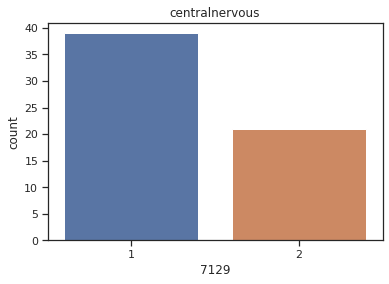

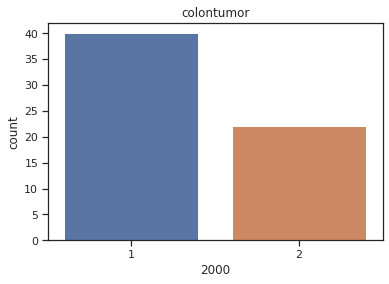

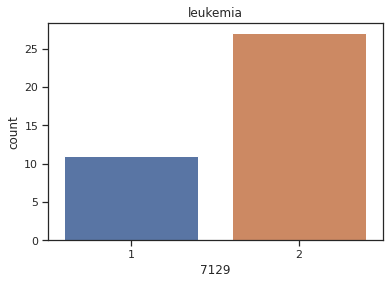

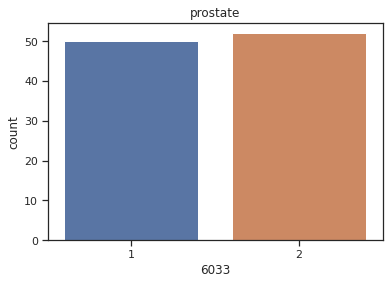

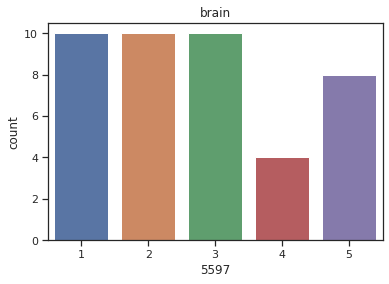

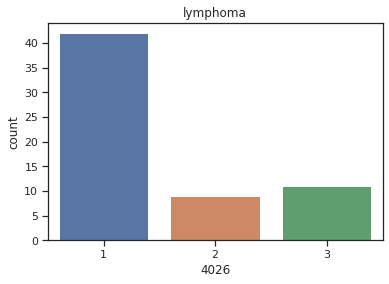

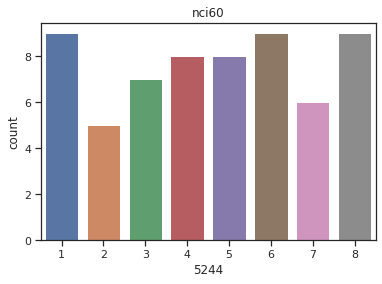

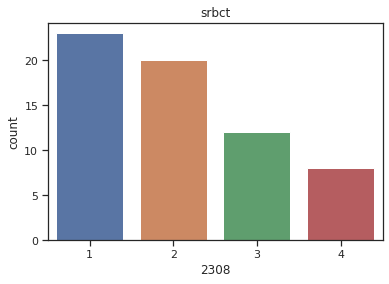

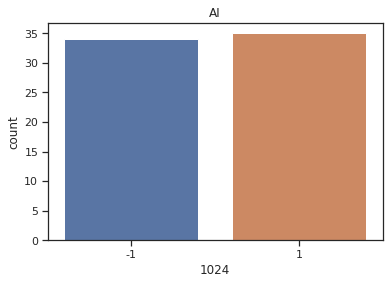

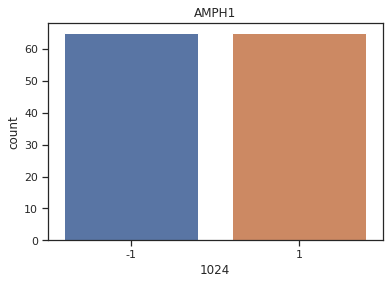

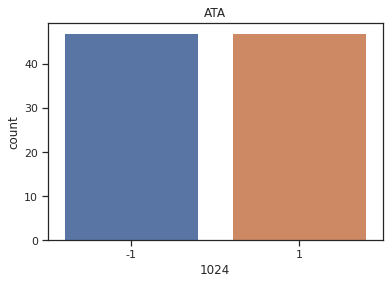

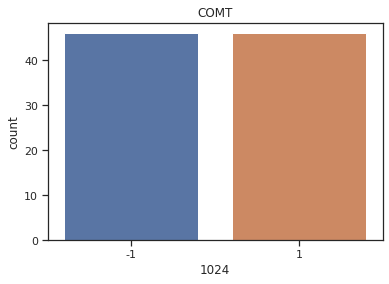

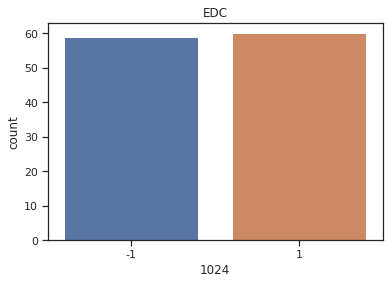

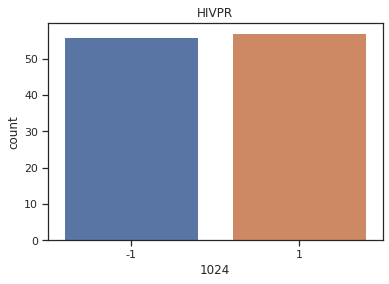

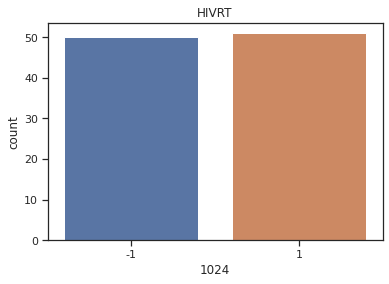

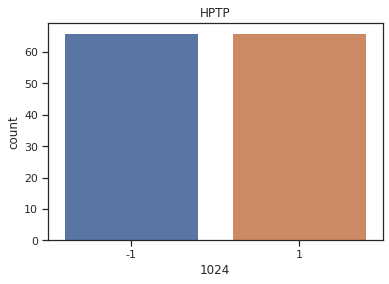

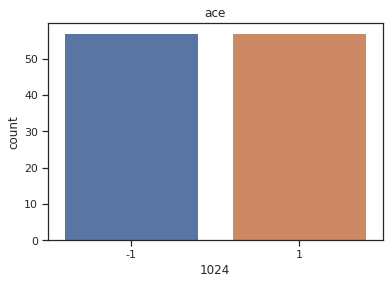

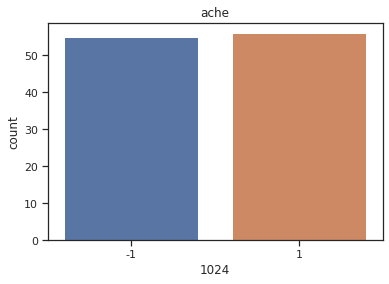

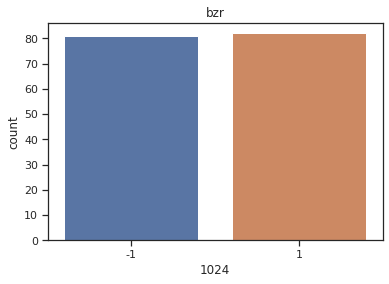

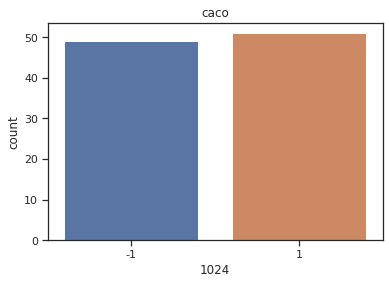

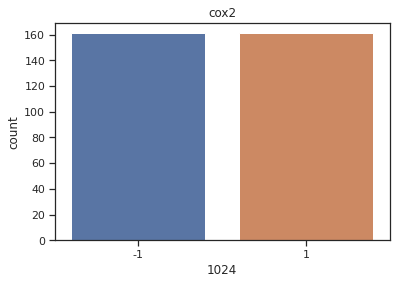

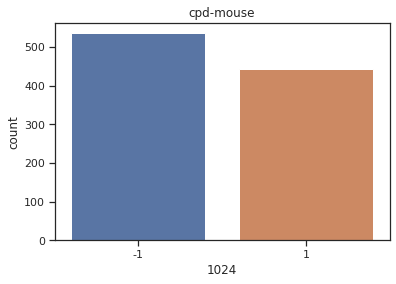

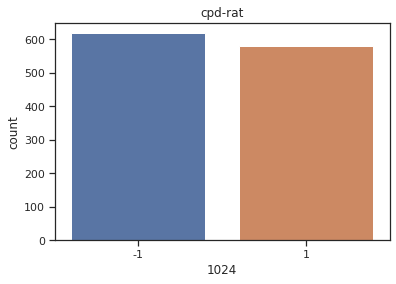

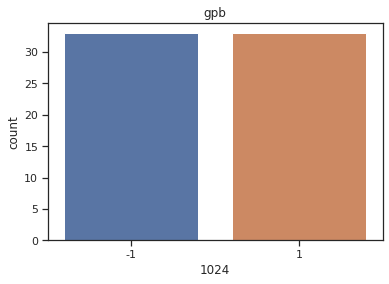

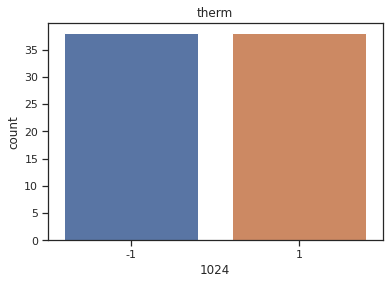

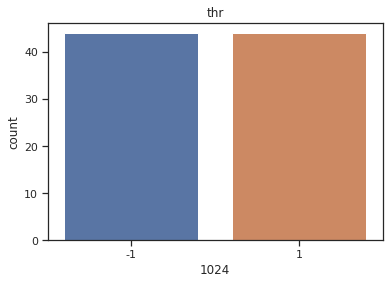

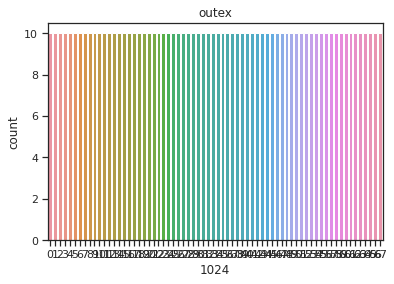

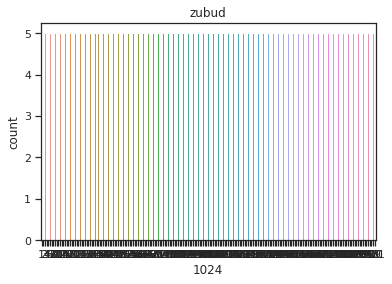

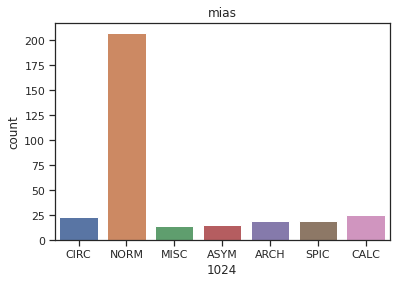

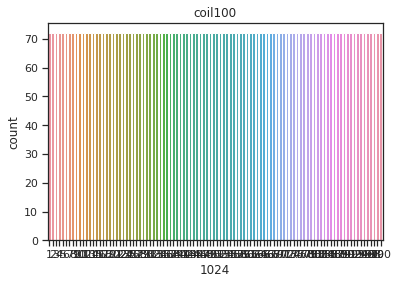

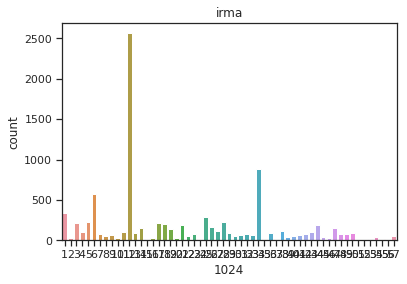

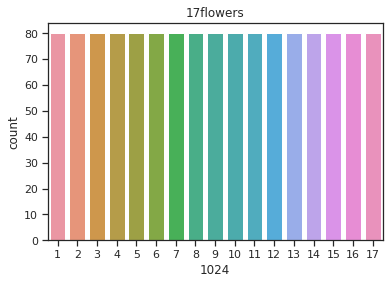

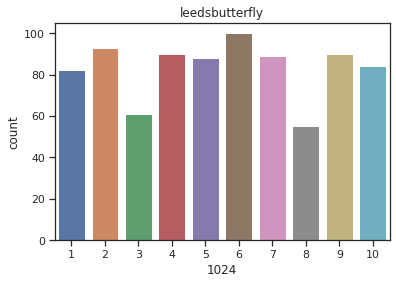

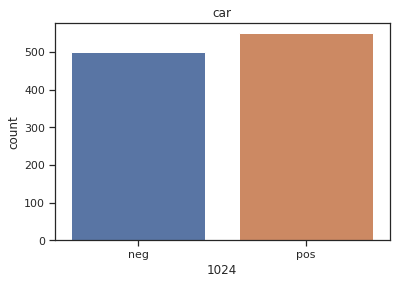

In [ ]:
# Microarray data
'''
Central Nervous & 7129 & 60 & 2 \\
Colon Tumor & 2000 & 62 & 2 \\
Leukemia & 7129 & 38 & 2 \\
Prostate & 6033 & 102 & 2 \\
Brain & 5597 & 42 & 5  \\
Lymphoma & 4026 & 62 & 3 \\
NCI60 & 5244 & 61 & 8 \\
SRBCT & 2308 & 63 & 4 \\ \hline

AI & 1024 & 69 & 2\\
AMPH1 & 1024 & 130 & 2\\
ATA & 1024 & 94 & 2\\
COMT & 1024 & 92 & 2\\
EDC & 1024 & 119 & 2\\
HIVPR & 1024 & 113 & 2\\
HIVRT & 1024 & 101 & 2\\
HPTP & 1024 & 132 & 2\\
ace & 1024 & 114 & 2\\
ache & 1024 & 111 & 2\\
bzr & 1024 & 163 & 2\\
caco & 1024 & 100 & 2\\
cox2 & 1024 & 322 & 2\\
cpd-mouse & 1024 & 980 & 2\\
cpd-rat & 1024 & 1198 & 2\\
gpb & 1024 & 66 & 2\\
therm & 1024 & 76 & 2\\
thr & 1024 & 88 & 2\\\hline

Outex & 1024 & 680 & 68\\
ZuBuD & 1024 & 1005 & 201\\
MIAS & 1024 & 322 & 7\\
COIL-100 & 1024 & 7200 & 100\\
IRMA & 1024 & 9000 & 57\\
17-Flower & 1024 & 1360 & 17\\
Leeds Butterfly & 1024 & 832 & 10\\
Car & 1024 & 1050 & 2\\\hline
'''
# Import Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

filenames=['centralnervous','colontumor','leukemia','prostate','brain','lymphoma','nci60','srbct', \
                 'AI','AMPH1','ATA','COMT','EDC','HIVPR','HIVRT','HPTP','ace','ache','bzr','caco','cox2','cpd-mouse','cpd-rat','gpb','therm','thr', \
                 'outex','zubud','mias','coil100','irma','17flowers','leedsbutterfly','car']
n=1
for filename in filenames:
  data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
  print(filename,data.shape)
  plt.figure(n)
  sns.countplot(data.iloc[:,-1])#,ax=axs[r,c])
  n=n+1
  plt.title(filename)

In [ ]:
# machine learnng mastery with python
# Import Data
import pandas as pd

filenames=['centralnervous']#,'colontumor','leukemia','prostate','brain','lymphoma','nci60','srbct', \
                 #'AI','AMPH1','ATA','COMT','EDC','HIVPR','HIVRT','HPTP','ace','ache','bzr','caco','cox2','cpd-mouse','cpd-rat','gpb','therm','thr', \
                 #'outex','zubud','mias','coil100','irma','17flowers','leedsbutterfly','car']

for filename in filenames:
  data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
  length=len(filename)
  print('*'*length)
  print(filename)
  print('*'*length)
  print(f'number of elements: {data.size}')
  print(f'number of dimensions: {data.shape}')
  print('*'*length)
  print(data.info())
  print('*'*length)
  print(data.describe())
  print('*'*length)
  print(data.head())
  print('*'*length)

**************
centralnervous
**************
number of elements: 427800
number of dimensions: (60, 7130)
**************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 7130 entries, 0 to 7129
dtypes: int64(7130)
memory usage: 3.3 MB
None
**************
             0           1           2           3           4     \
count   60.000000   60.000000   60.000000   60.000000   60.000000   
mean   -95.083333  -91.650000    8.366667   95.033333 -231.966667   
std    120.779852  119.931736  122.938040  156.914526  179.484853   
min   -492.000000 -414.000000 -300.000000 -370.000000 -746.000000   
25%   -152.250000 -131.500000  -62.250000   -4.000000 -312.000000   
50%    -82.500000  -76.500000   18.500000   74.000000 -173.000000   
75%    -26.750000  -30.250000   91.000000  214.250000 -111.250000   
max    216.000000  238.000000  362.000000  378.000000   81.000000   

              5            6           7           8           9     ...  \
count    60.000000

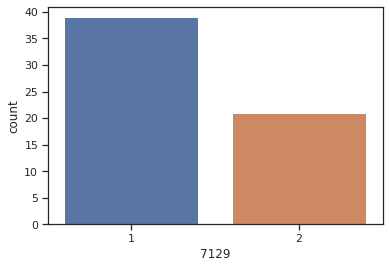

In [ ]:
# visualizing class variable
import matplotlib.pyplot as plt
import seaborn as sns
r,c = data.shape
sns.countplot(x=c-1,data=data)
plt.show()

In [ ]:
dfcorr=data.corr(method='pearson')
dfcorr

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
0,1.000000,0.441605,0.354672,-0.283955,0.088183,0.151166,-0.032157,0.267688,-0.122701,0.140761,...,-0.169388,0.043244,0.132590,0.260532,-0.112762,-0.055663,0.329389,0.248549,0.116907,0.109334
1,0.441605,1.000000,0.234619,-0.228700,0.026133,0.116801,0.162728,0.401995,-0.375961,0.154948,...,-0.089174,0.188177,-0.172445,0.079986,-0.200617,-0.268602,-0.079311,0.096539,-0.025574,0.201454
2,0.354672,0.234619,1.000000,-0.102475,-0.138552,0.083548,-0.019619,-0.084673,0.011882,-0.002459,...,-0.093172,0.121531,-0.152264,0.198717,0.197981,0.180000,0.180044,0.314138,0.077526,-0.041189
3,-0.283955,-0.228700,-0.102475,1.000000,-0.218571,-0.073508,0.166375,0.059818,0.043231,-0.238430,...,0.199189,0.053760,0.106123,0.216890,0.203714,0.082234,0.162305,0.126178,-0.122724,-0.145452
4,0.088183,0.026133,-0.138552,-0.218571,1.000000,0.479685,-0.130631,0.482279,-0.391819,-0.091613,...,-0.337173,-0.068527,0.009757,-0.001948,-0.533784,-0.473714,0.040162,-0.394293,-0.227224,0.174594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7125,-0.055663,-0.268602,0.180000,0.082234,-0.473714,-0.340327,-0.162510,-0.528116,0.498326,-0.013079,...,0.367406,0.038135,0.287084,0.201036,0.573330,1.000000,0.183878,0.208747,0.310751,-0.271833
7126,0.329389,-0.079311,0.180044,0.162305,0.040162,0.049446,0.058399,0.053631,0.087046,0.022512,...,-0.027538,0.500495,0.698130,0.792414,0.130066,0.183878,1.000000,0.526024,0.479370,-0.176568
7127,0.248549,0.096539,0.314138,0.126178,-0.394293,-0.356885,0.243904,-0.357203,0.296731,0.267844,...,-0.009474,0.562027,0.253225,0.432598,0.221060,0.208747,0.526024,1.000000,0.336547,-0.162818
7128,0.116907,-0.025574,0.077526,-0.122724,-0.227224,0.032587,0.202126,-0.248088,0.368400,0.105210,...,0.192033,0.345262,0.460061,0.483698,0.222381,0.310751,0.479370,0.336547,1.000000,-0.081780


In [ ]:
import numpy as np
r,c = dfcorr.shape
imatrix = np.identity(r)
dfcorr2 = dfcorr - imatrix
dfcorr2

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
0,0.000000,0.441605,0.354672,-0.283955,0.088183,0.151166,-0.032157,0.267688,-0.122701,0.140761,...,-0.169388,0.043244,0.132590,0.260532,-0.112762,-0.055663,0.329389,0.248549,0.116907,0.109334
1,0.441605,0.000000,0.234619,-0.228700,0.026133,0.116801,0.162728,0.401995,-0.375961,0.154948,...,-0.089174,0.188177,-0.172445,0.079986,-0.200617,-0.268602,-0.079311,0.096539,-0.025574,0.201454
2,0.354672,0.234619,0.000000,-0.102475,-0.138552,0.083548,-0.019619,-0.084673,0.011882,-0.002459,...,-0.093172,0.121531,-0.152264,0.198717,0.197981,0.180000,0.180044,0.314138,0.077526,-0.041189
3,-0.283955,-0.228700,-0.102475,0.000000,-0.218571,-0.073508,0.166375,0.059818,0.043231,-0.238430,...,0.199189,0.053760,0.106123,0.216890,0.203714,0.082234,0.162305,0.126178,-0.122724,-0.145452
4,0.088183,0.026133,-0.138552,-0.218571,0.000000,0.479685,-0.130631,0.482279,-0.391819,-0.091613,...,-0.337173,-0.068527,0.009757,-0.001948,-0.533784,-0.473714,0.040162,-0.394293,-0.227224,0.174594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7125,-0.055663,-0.268602,0.180000,0.082234,-0.473714,-0.340327,-0.162510,-0.528116,0.498326,-0.013079,...,0.367406,0.038135,0.287084,0.201036,0.573330,0.000000,0.183878,0.208747,0.310751,-0.271833
7126,0.329389,-0.079311,0.180044,0.162305,0.040162,0.049446,0.058399,0.053631,0.087046,0.022512,...,-0.027538,0.500495,0.698130,0.792414,0.130066,0.183878,0.000000,0.526024,0.479370,-0.176568
7127,0.248549,0.096539,0.314138,0.126178,-0.394293,-0.356885,0.243904,-0.357203,0.296731,0.267844,...,-0.009474,0.562027,0.253225,0.432598,0.221060,0.208747,0.526024,0.000000,0.336547,-0.162818
7128,0.116907,-0.025574,0.077526,-0.122724,-0.227224,0.032587,0.202126,-0.248088,0.368400,0.105210,...,0.192033,0.345262,0.460061,0.483698,0.222381,0.310751,0.479370,0.336547,0.000000,-0.081780


In [ ]:
c= dfcorr2.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so[-10:]

868   6352    0.980952
6352  868     0.980952
1807  3279    0.985803
3279  1807    0.985803
34    33      0.988535
33    34      0.988535
5733  5325    0.990035
5325  5733    0.990035
1807  6904    0.990874
6904  1807    0.990874
dtype: float64

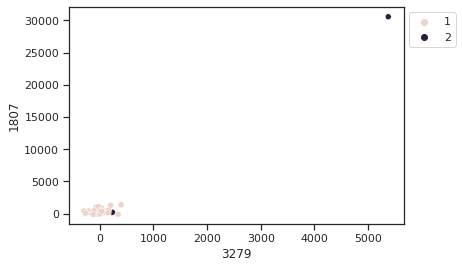

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=3279,y=1807,hue=7129, data=data)
plt.legend(bbox_to_anchor=(1,1),loc=2)

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), (0.5490196078431373, 0.5490196078431373, 0.5490196078431373), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]


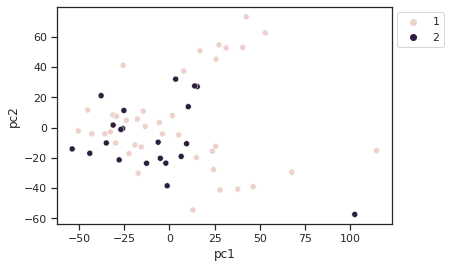

In [ ]:
from sklearn.preprocessing import StandardScaler
# pca
# Standardize the Data
X = data.iloc[:,:7129]
y = data.iloc[:,7129]

X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X)
principaldf = pd.DataFrame(data=principalComponents, columns=['pc1','pc2','pc3','pc4','pc5','pc6'])
finalDf = pd.concat([principaldf, y], axis = 1)
finalDf

import matplotlib.pyplot as plt
import seaborn as sns
#sns.color_palette("tab10")
#sns.color_palette("rocket", as_cmap=True)
#sns.set_palette("rocket")
print(sns.color_palette())
sns.scatterplot(x='pc1',y='pc2',hue=7129, data=finalDf)
plt.legend(bbox_to_anchor=(1,1),loc=2)

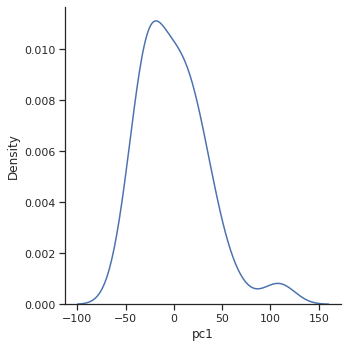

In [ ]:
sns.displot(finalDf, x='pc1', kind="kde")

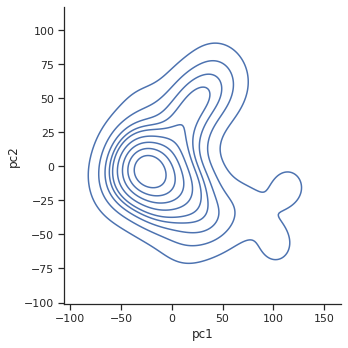

In [ ]:
sns.displot(finalDf, x='pc1', y='pc2', kind="kde")

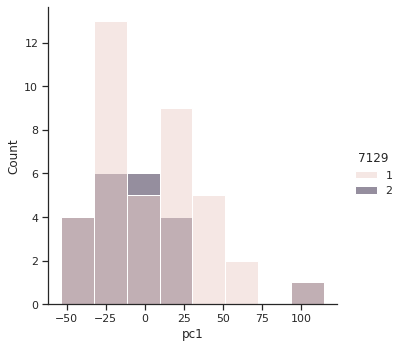

In [ ]:
sns.displot(finalDf, x='pc1',hue=7129)

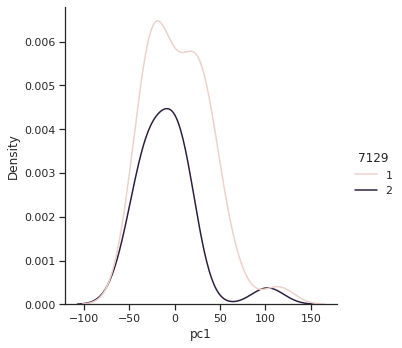

In [ ]:
sns.displot(finalDf, x='pc1', hue=7129, kind="kde")

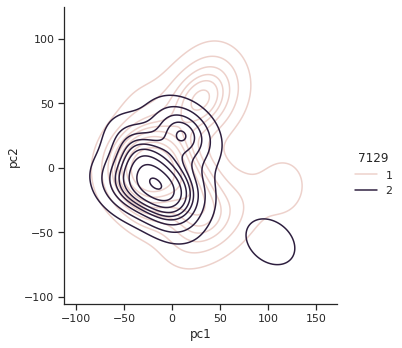

In [ ]:
sns.displot(finalDf, x='pc1', y='pc2', hue=7129, kind="kde")

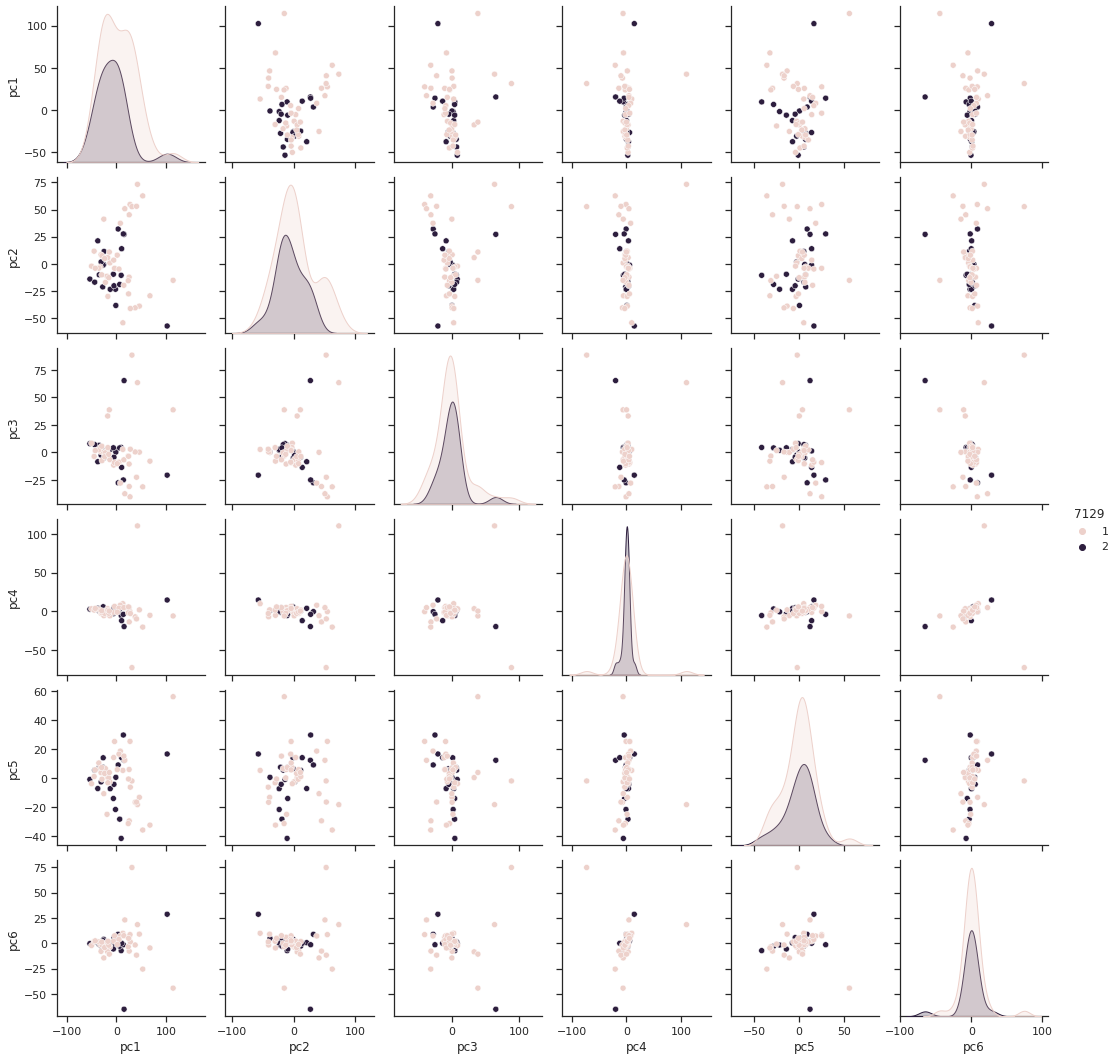

In [ ]:
sns.pairplot(finalDf,hue=7129)

In [ ]:
# statistical summary
# Import Data
from pandas import read_csv
from pandas import set_option
filenames=['centralnervous','colontumor','leukemia','prostate','brain','lymphoma','nci60','srbct', \
                 'AI','AMPH1','ATA','COMT','EDC','HIVPR','HIVRT','HPTP','ace','ache','bzr','caco','cox2','cpd-mouse','cpd-rat','gpb','therm','thr', \
                 'outex','zubud','mias','coil100','irma','17flowers','leedsbutterfly','car']
set_option('display.width',100)
set_option('precision',3)
for filename in filenames:
  data = read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
  length=len(filename)
  print('*'*length)
  print(filename)
  print('*'*length)
  print(data.describe())
  print('*'*length)

**************
centralnervous
**************
          0        1        2        3        4         5         6        7        8        9     \
count   60.000   60.000   60.000   60.000   60.000    60.000    60.000   60.000   60.000   60.000   
mean   -95.083  -91.650    8.367   95.033 -231.967  -343.350    53.617 -160.267   57.317  129.033   
std    120.780  119.932  122.938  156.915  179.485   215.095   415.350  121.334  142.485  183.067   
min   -492.000 -414.000 -300.000 -370.000 -746.000 -1216.000 -1231.000 -528.000 -238.000 -462.000   
25%   -152.250 -131.500  -62.250   -4.000 -312.000  -407.500  -190.000 -192.500  -12.250    6.000   
50%    -82.500  -76.500   18.500   74.000 -173.000  -300.000    72.500 -134.500   30.000  107.000   
75%    -26.750  -30.250   91.000  214.250 -111.250  -219.250   337.250  -77.000  114.250  250.750   
max    216.000  238.000  362.000  378.000   81.000    34.000   896.000   31.000  683.000  497.000   

       ...      7120     7121     7122     71

*****
brain
*****
       0      1      2      3      4      5      6      7      8      9     ...   5588   5589  \
0     1.000  0.271  0.191 -0.266  0.356  0.035 -0.081  0.417  0.252  0.119  ...  0.030 -0.335   
1     0.271  1.000 -0.075  0.028  0.132  0.046  0.201  0.257  0.274 -0.140  ... -0.006 -0.091   
2     0.191 -0.075  1.000  0.103  0.062  0.320  0.315  0.101  0.116  0.266  ... -0.072 -0.184   
3    -0.266  0.028  0.103  1.000 -0.276  0.191  0.220 -0.197  0.038  0.038  ...  0.065  0.282   
4     0.356  0.132  0.062 -0.276  1.000  0.303  0.257  0.321  0.299  0.167  ...  0.238 -0.183   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...    ...    ...   
5593  0.345  0.193  0.208 -0.183  0.182  0.211  0.314  0.049  0.398 -0.004  ... -0.277 -0.631   
5594  0.366  0.073  0.021 -0.330  0.318  0.159  0.253  0.099  0.392  0.102  ... -0.187 -0.539   
5595  0.076  0.221  0.075  0.031  0.449  0.195  0.185  0.474  0.309 -0.267  ...  0.133  0.153   
5596  0.274 

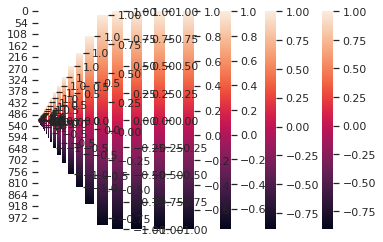

In [ ]:
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
# correlation between attributes
# statistical summary
# Import Data
from pandas import read_csv
from pandas import set_option
import matplotlib.pyplot as plt
import seaborn as sns

#filenames=['centralnervous','colontumor','leukemia','prostate','brain','lymphoma','nci60','srbct', \
#                 'AI','AMPH1','ATA','COMT','EDC','HIVPR','HIVRT','HPTP','ace','ache','bzr','caco','cox2','cpd-mouse','cpd-rat','gpb','therm','thr', \
#                 'outex','zubud','mias','coil100','irma','17flowers','leedsbutterfly','car']


filenames=['brain','lymphoma','nci60','srbct', \
                 'AI','AMPH1','ATA','COMT','EDC','HIVPR','HIVRT','HPTP','ace','ache','bzr','caco','cox2','cpd-mouse','cpd-rat','gpb','therm','thr', \
                 'outex','zubud','mias','coil100','irma','17flowers','leedsbutterfly','car']
set_option('display.width',100)
set_option('precision',3)
for filename in filenames:
  data = read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
  length=len(filename)
  print('*'*length)
  print(filename)
  print('*'*length)
  print(data.corr(method='pearson'))
  sns.heatmap(data.corr(method='pearson'));
  plt.savefig('heatmap_'+filename+'.png', dpi=300, bbox_inches='tight')
  print('*'*length)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,7120,7121,7122,7123,7124,7125,7126,7127,7128,7129
0,-60,-109,45,22,7,-61,-211,-102,-20,98,...,1082,-12,44,-48,123,89,-25,56,-63,2
1,-159,-113,-62,-16,-160,-395,97,-157,15,-8,...,1295,-677,-452,-750,1273,-1,-750,-45,-293,2
2,-119,-31,4,-11,-197,-541,-277,-166,17,392,...,592,55,88,-37,310,159,11,2,2,2
3,41,9,-256,370,-302,-680,254,31,186,358,...,433,71,-237,-166,52,-48,-183,328,-244,2
4,-165,-57,171,216,-692,-381,762,-6,44,216,...,2160,-120,-82,-25,3888,393,-38,190,38,2


In [ ]:
data.iloc[:,-1]

In [ ]:
import pandas as pd
from sklearn import neighbors
for filename in ['centralnervous','colontumor','leukemia','prostate','brain','lymphoma','nci60','srbct', \
                 'AI','AMPH1','ATA','COMT','EDC','HIVPR','HIVRT','HPTP','ace','ache','bzr','caco','cox2','cpd-mouse','cpd-rat','gpb','therm','thr', \
                 'outex','zubud','mias','coil100','irma','17flowers','leedsbutterfly','car']:
                 data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
                 X = data.iloc[:,:-1]
                 y = data.iloc[:,-1]
                 clf = neighbors.KNeighborsClassifier()
                 clf = clf.fit(X,y)
                 print(f'{filename:15s}: {clf.score(X,y):.2f}')

centralnervous : 0.82
colontumor     : 0.87
leukemia       : 0.95
prostate       : 0.89
brain          : 0.79
lymphoma       : 0.98
nci60          : 0.82
srbct          : 0.98
AI             : 0.91
AMPH1          : 0.74
ATA            : 0.76
COMT           : 0.86
EDC            : 0.83
HIVPR          : 0.79
HIVRT          : 0.89
HPTP           : 0.86
ace            : 0.89
ache           : 0.79
bzr            : 0.81
caco           : 0.83
cox2           : 0.83
cpd-mouse      : 0.78
cpd-rat        : 0.75
gpb            : 0.86
therm          : 0.87
thr            : 0.72
outex          : 0.25
zubud          : 0.66
mias           : 0.64
coil100        : 0.99
irma           : 0.81
17flowers      : 0.42
leedsbutterfly : 0.43
car            : 0.96


# Nearest Neighbor in High dimensions
## Raw Accuracies

In [ ]:
import pandas as pd
from sklearn import neighbors
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
dfraw = pd.DataFrame(columns=['DataSet','rawMean','rawStd'])
for filename in ['centralnervous','colontumor','leukemia','prostate','brain','lymphoma','nci60','srbct', \
                 'AI','AMPH1','ATA','COMT','EDC','HIVPR','HIVRT','HPTP','ace','ache','bzr','caco','cox2','cpd-mouse','cpd-rat','gpb','therm','thr', \
                 'outex','zubud','mias','coil100','irma','17flowers','leedsbutterfly','car']:
                 data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
                 X = data.iloc[:,:-1]
                 y = data.iloc[:,-1]
                 scaler = Normalizer().fit(X)
                 normalizedX = scaler.transform(X)
                 clf = neighbors.KNeighborsClassifier()
                 #clf = clf.fit(X,y)
                 #print(f'{filename:15s}: {clf.score(X,y):.2f}')
                 #kfold = KFold(n_splits=10, random_state=7, shuffle=True)
                 #scores = cross_val_score(clf, X, y, cv=kfold)
                 #scores = cross_val_score(clf, X, y, cv=10)
                 skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
                 scores = cross_val_score(clf, normalizedX, y, cv=skf)
                 #print(f'{filename:15s}: {scores.mean()*100.0:.2f}%, ({scores.std()*100.0:.2f}%)')
                 dfraw = dfraw.append({'DataSet':filename,'rawMean':scores.mean()*100.0,'rawStd':scores.std()*100.0},ignore_index=True)
dfraw

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


,DataSet,rawMean,rawStd
0,centralnervous,58.333333,7.453560
1,colontumor,85.641026,7.666624
2,leukemia,92.142857,6.448382
3,prostate,86.238095,8.635212
4,brain,74.444444,12.316555
5,lymphoma,98.333333,3.333333
6,nci60,65.384615,10.135505
7,srbct,95.256410,6.222903
8,AI,87.142857,9.476071
9,AMPH1,53.846154,8.067760


## Rescale Data (between 0 to 1)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dfrescaled = pd.DataFrame(columns=['DataSet','dfrMean','dfrStd'])
for filename in ['centralnervous','colontumor','leukemia','prostate','brain','lymphoma','nci60','srbct', \
                 'AI','AMPH1','ATA','COMT','EDC','HIVPR','HIVRT','HPTP','ace','ache','bzr','caco','cox2','cpd-mouse','cpd-rat','gpb','therm','thr', \
                 'outex','zubud','mias','coil100','irma','17flowers','leedsbutterfly','car']:
                 data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
                 X = data.iloc[:,:-1]
                 y = data.iloc[:,-1]
                 scaler = MinMaxScaler(feature_range=(0, 1))
                 rescaledX = scaler.fit_transform(X)
                 clf = neighbors.KNeighborsClassifier()
                 kfold = KFold(n_splits=10, random_state=7, shuffle=True)
                 scores = cross_val_score(clf, rescaledX, y, cv=kfold)
                 #print(f'{filename:15s}: {scores.mean()*100.0:.2f}%, ({scores.std()*100.0:.2f}%)')
                 dfrescaled = dfrescaled.append({'DataSet':filename,'dfrMean':scores.mean()*100.0,'dfrStd':scores.std()*100.0},ignore_index=True)
dfrescaled

,DataSet,dfrMean,dfrStd
0,centralnervous,61.666667,19.790570
1,colontumor,74.047619,13.360941
2,leukemia,81.666667,20.000000
3,prostate,89.090909,8.322031
4,brain,70.500000,22.186708
5,lymphoma,98.333333,5.000000
6,nci60,64.047619,25.319948
7,srbct,81.666667,20.344259
8,AI,81.190476,18.084270
9,AMPH1,56.153846,13.345655


## Normalize Data (length of 1)

In [ ]:
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dfnormalized = pd.DataFrame(columns=['DataSet','dfnMean','dfnStd'])
for filename in ['centralnervous','colontumor','leukemia','prostate','brain','lymphoma','nci60','srbct', \
                 'AI','AMPH1','ATA','COMT','EDC','HIVPR','HIVRT','HPTP','ace','ache','bzr','caco','cox2','cpd-mouse','cpd-rat','gpb','therm','thr', \
                 'outex','zubud','mias','coil100','irma','17flowers','leedsbutterfly','car']:
                 data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
                 X = data.iloc[:,:-1]
                 y = data.iloc[:,-1]
                 scaler = Normalizer().fit(X)
                 normalizedX = scaler.transform(X)
                 clf = neighbors.KNeighborsClassifier()
                 kfold = KFold(n_splits=10, random_state=7, shuffle=True)
                 scores = cross_val_score(clf, normalizedX, y, cv=kfold)
                 #print(f'{filename:15s}: {scores.mean()*100.0:.2f}%, ({scores.std()*100.0:.2f}%)')
                 dfnormalized = dfnormalized.append({'DataSet':filename,'dfnMean':scores.mean()*100.0,'dfnStd':scores.std()*100.0},ignore_index=True)
dfnormalized

,DataSet,dfnMean,dfnStd
0,centralnervous,60.000000,15.275252
1,colontumor,85.714286,10.962728
2,leukemia,91.666667,17.078251
3,prostate,86.090909,9.208781
4,brain,70.500000,22.186708
5,lymphoma,98.333333,5.000000
6,nci60,67.142857,21.130198
7,srbct,93.571429,10.861424
8,AI,85.714286,12.777531
9,AMPH1,51.538462,13.345655


In [ ]:
import pandas as pd
#import numpy as np
#from google.colab import data_table
#data_table.enable_dataframe_formatter()

temp = pd.merge(dfraw,dfrescaled,on='DataSet',how='outer')
temp = pd.merge(temp,dfnormalized,on='DataSet',how='outer')

temp

,DataSet,rawMean,rawStd,dfrMean,dfrStd,dfnMean,dfnStd
0,centralnervous,58.333333,7.453560,61.666667,19.790570,60.000000,15.275252
1,colontumor,85.641026,7.666624,74.047619,13.360941,85.714286,10.962728
2,leukemia,92.142857,6.448382,81.666667,20.000000,91.666667,17.078251
3,prostate,86.238095,8.635212,89.090909,8.322031,86.090909,9.208781
4,brain,74.444444,12.316555,70.500000,22.186708,70.500000,22.186708
5,lymphoma,98.333333,3.333333,98.333333,5.000000,98.333333,5.000000
6,nci60,65.384615,10.135505,64.047619,25.319948,67.142857,21.130198
7,srbct,95.256410,6.222903,81.666667,20.344259,93.571429,10.861424
8,AI,87.142857,9.476071,81.190476,18.084270,85.714286,12.777531
9,AMPH1,53.846154,8.067760,56.153846,13.345655,51.538462,13.345655


In [ ]:
temp[temp['rawMean']<temp['dfrMean']]

,DataSet,rawMean,rawStd,dfrMean,dfrStd,dfnMean,dfnStd
0,centralnervous,58.333333,7.453560,61.666667,19.790570,60.000000,15.275252
3,prostate,86.238095,8.635212,89.090909,8.322031,86.090909,9.208781
9,AMPH1,53.846154,8.067760,56.153846,13.345655,51.538462,13.345655
11,COMT,74.093567,11.475407,78.111111,20.560360,77.111111,12.690037
14,HIVRT,80.190476,8.375269,84.181818,10.141153,83.181818,10.010325
17,ache,60.513834,9.160585,66.742424,11.198036,63.181818,13.854319
18,bzr,68.712121,4.104914,71.213235,10.189927,69.411765,9.252443
20,cox2,70.225962,5.943941,72.073864,7.276826,72.386364,5.134497
23,gpb,77.142857,7.135245,79.047619,6.281384,79.047619,6.281384
24,therm,69.500000,14.564035,77.142857,15.105919,72.321429,13.745361


In [ ]:
temp[temp['rawMean']<temp['dfnMean']][['DataSet','rawMean','dfnMean']]

,DataSet,rawMean,dfnMean
0,centralnervous,58.333333,60.000000
1,colontumor,85.641026,85.714286
6,nci60,65.384615,67.142857
11,COMT,74.093567,77.111111
13,HIVPR,70.750988,71.515152
14,HIVRT,80.190476,83.181818
17,ache,60.513834,63.181818
18,bzr,68.712121,69.411765
19,caco,58.000000,63.000000
20,cox2,70.225962,72.386364


## Paper I

In [ ]:
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
#dfnormalized = pd.DataFrame(columns=['DataSet','dfnMean','dfnStd'])
#for filename in ['centralnervous','colontumor','leukemia','prostate','brain','lymphoma','nci60','srbct', \
#                 'AI','AMPH1','ATA','COMT','EDC','HIVPR','HIVRT','HPTP','ace','ache','bzr','caco','cox2','cpd-mouse','cpd-rat','gpb','therm','thr', \
#                 'outex','zubud','mias','coil100','irma','17flowers','leedsbutterfly','car']:
for filename in ['centralnervous']:
                 data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
                 X = data.iloc[:,:-1]
                 y = data.iloc[:,-1]
                 scaler = Normalizer().fit(X)
                 normalizedX = scaler.transform(X)
                 clf = neighbors.KNeighborsClassifier()
                 kfold = KFold(n_splits=10, random_state=7, shuffle=True)
                 scores = cross_val_score(clf, normalizedX, y, cv=kfold)
                 #print(f'{filename:15s}: {scores.mean()*100.0:.2f}%, ({scores.std()*100.0:.2f}%)')
                 #dfnormalized = dfnormalized.append({'DataSet':filename,'dfnMean':scores.mean()*100.0,'dfnStd':scores.std()*100.0},ignore_index=True)
                 
                 #dfnormalized
                 scores.mean()*100.0

                 with open(filename+'accuracy_raw.pkl','wb') as f:
                   pickle.dump(scores.mean()*100.0, f)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

for filename in ['centralnervous']:
                 data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
                 X = data.iloc[:,:-1]
                 y = data.iloc[:,-1]
                 scaler = Normalizer().fit(X)
                 normalizedX = scaler.transform(X)
                 pca = PCA(n_components=60)
                 newX=pca.fit(normalizedX)
                 knn = neighbors.KNeighborsClassifier()
                 #kfold = KFold(n_splits=10, random_state=7, shuffle=True)
                 #scores = cross_val_score(knn, newX, y, kfold)
                 #print(newX.shape)
                 #print(y.shape)
                 print(type(newX))


<class 'sklearn.decomposition._pca.PCA'>


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

for filename in ['centralnervous']:
                 data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
                 X = data.iloc[:,:-1]
                 y = data.iloc[:,-1]
                 scaler = Normalizer().fit(X)
                 normalizedX = scaler.transform(X)
                 pca = PCA(n_components=60).fit(normalizedX)
                 columns = ['pc_%i' % i for i in range(1,61)]
                 df_pca  = pd.DataFrame(pca.transform(X), columns=columns, index=X.index)
                 knn = neighbors.KNeighborsClassifier()
                 # train test split
                 #X_train, X_test, y_train, y_test = train_test_split(df_pca, y, test_size=0.3)
                 #clf = knn.fit(X_train,y_train)
                 #preds = knn.predict(X_test)
                 #print(f'{filename:15s}: {clf.score(X,y):.2f}')
                 kfold = KFold(n_splits=10, random_state=7, shuffle=True)
                 scores = cross_val_score(knn, df_pca, y, cv=kfold)
                 #print(newX.shape)
                 #print(y.shape)
                 #print(preds)
print(scores)

[0.83333333 0.66666667 0.5        0.66666667 0.66666667 0.5
 0.5        0.5        0.66666667 0.66666667]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn import random_projection
from sklearn import neighbors
#from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pickle

# issues: nci60,zubud with stratification

#for filename in ['centralnervous','colontumor','leukemia','prostate','brain','lymphoma','nci60','srbct', \
#                 'AI','AMPH1','ATA','COMT','EDC','HIVPR','HIVRT','HPTP','ace','ache','bzr','caco','cox2','cpd-mouse','cpd-rat','gpb','therm','thr', \
#                 'outex','zubud','mias','coil100','irma','17flowers','leedsbutterfly','car']:
for filename in ['coil100','irma','17flowers','leedsbutterfly','car']:
                 data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
                 X = data.iloc[:,:-1]
                 y = data.iloc[:,-1]
                 r,c = X.shape
                 # number of dimensions as selected as min(noofrows,60)
                 noDim = r if r <= 60 else 60
                 scaler = Normalizer().fit(X)
                 normalizedX = scaler.transform(X)
                 
                 error_ratesPCA = []
                 error_ratesRP = []
                 error_ratesRP30 = []

                 pca = PCA(n_components=noDim).fit(normalizedX)
                 columns = ['pc_%i' % i for i in range(1,noDim+1)]
                 df_pca  = pd.DataFrame(pca.transform(X), columns=columns, index=X.index)
                 for c in range(1, noDim+1):
                     pcaX=df_pca.iloc[:,:c]
                     clf = neighbors.KNeighborsClassifier()
                     #kfold = KFold(n_splits=10, random_state=7, shuffle=True)
                     #scores = cross_val_score(clf, pcaX, y, cv=kfold)
                     skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
                     scores = cross_val_score(clf, pcaX, y, cv=skf)
                     error_ratesPCA.append(scores.mean()*100.0)

                 rp = random_projection.GaussianRandomProjection(n_components=250)
                 rpXall=rp.fit_transform(normalizedX)
# RP                 
#                 for c in range(1, noDim+1):
#                     rpX=rpXall[:,:c]
#                     clf = neighbors.KNeighborsClassifier()
#                     kfold = KFold(n_splits=10, random_state=7, shuffle=True)
#                     scores = cross_val_score(clf, rpX, y, cv=kfold)
#                     error_ratesRP.append(scores.mean()*100.0)

                 for c in range(1, noDim+1):
                     rpX=rpXall[:,:c]
                     clf = neighbors.KNeighborsClassifier()
                     #kfold = KFold(n_splits=10, random_state=7, shuffle=True)
                     #scores = cross_val_score(clf, rpX, y, cv=kfold)
                     skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
                     scores = cross_val_score(clf, rpX, y, cv=skf)
                     #print('--1--',c,scores.mean()*100.0)
                     error_ratesRP.append(scores.mean()*100.0)

                     scores=[]
                     # rp 30 
                     for i in range(1, 31):
                         #kfold = KFold(n_splits=10, random_state=i, shuffle=True)
                         #score = cross_val_score(clf, rpX, y, cv=kfold)
                         skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=i)
                         score = cross_val_score(clf, rpX, y, cv=skf)
                         #print(i,score.mean()*100.0)
                         scores.append(score.mean()*100.0)
                     #print('--2--',c,sum(scores)/len(scores))
                     #
                     error_ratesRP30.append(sum(scores)/len(scores))
                     #print(c,error_ratesRP)

                 with open(filename+'accuracy_rp30.pkl','wb') as f:
                   pickle.dump(error_ratesRP30, f)
                 with open(filename+'accuracy_rp.pkl','wb') as f:
                   pickle.dump(error_ratesRP, f)
                 with open(filename+'accuracy_pca.pkl','wb') as f:
                   pickle.dump(error_ratesPCA, f)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklear

In [ ]:
                 plt.figure(figsize=(10, 7))
                 #plt.plot(range(1,noDim+1),error_ratesPCA,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10,label='PCA')
                 plt.plot(range(1,noDim+1),error_ratesRP,color='green', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10,label='RP')
                 plt.plot(range(1,noDim+1),error_ratesRP30,color='red', linestyle='dashed', marker='o', markerfacecolor='orange', markersize=10,label='RP30')
                 plt.title(filename, {'fontsize':20})
                 plt.xlabel('Number of Attributes')
                 plt.ylabel('Classification Accuracy')
                 #plt.legend(loc='upper center', shadow=True, fontsize='x-large')
                 plt.legend(shadow=True, fontsize='x-large')
                 #plt.xlim(-10, 80)
                 plt.ylim(0, 100)
                 plt.show()
                 plt.savefig(filename+'_rpvrp30.png')

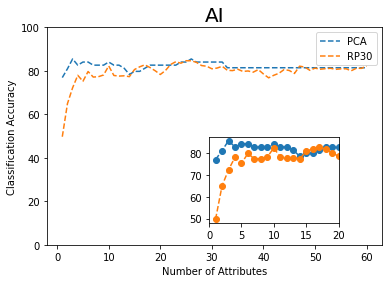

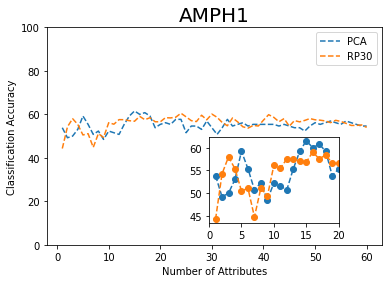

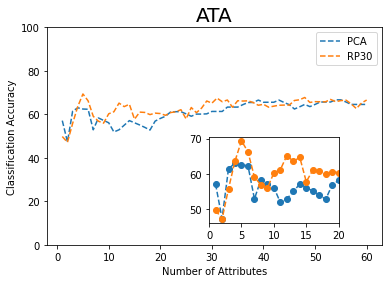

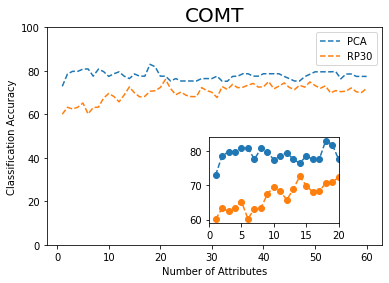

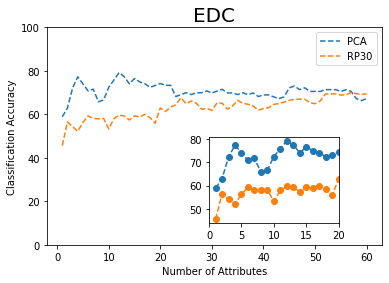

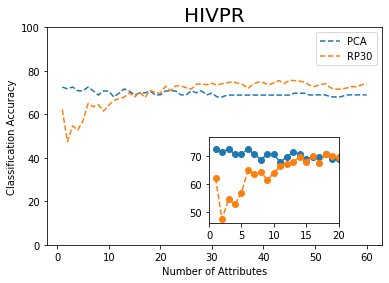

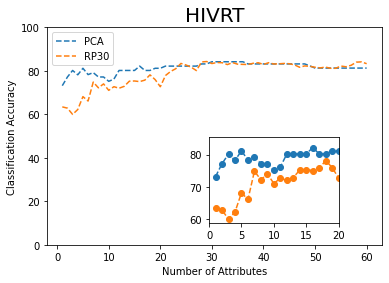

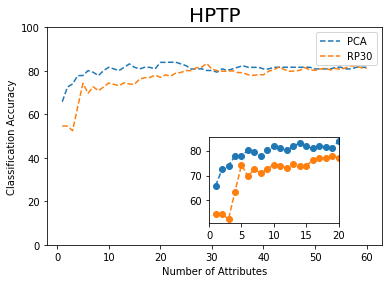

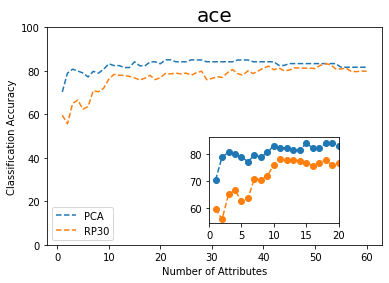

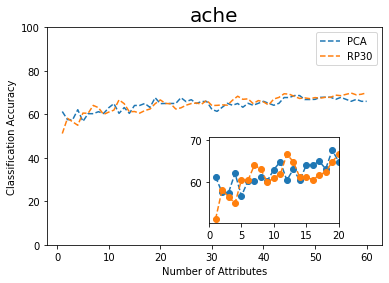

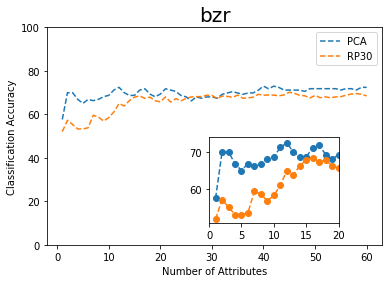

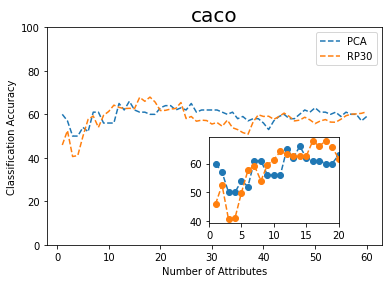

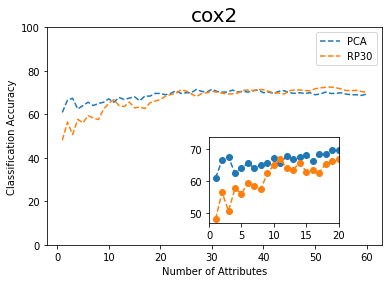

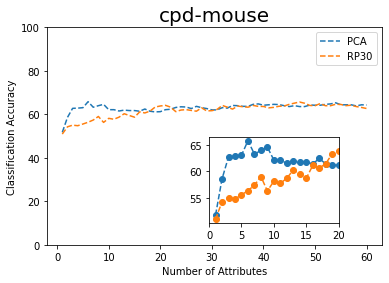

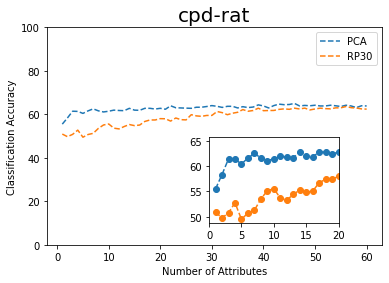

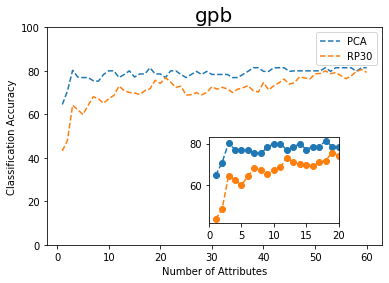

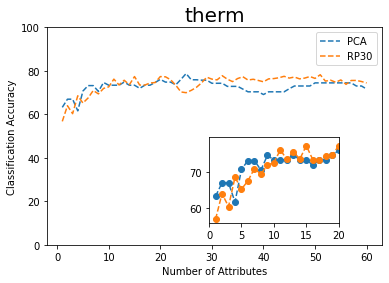

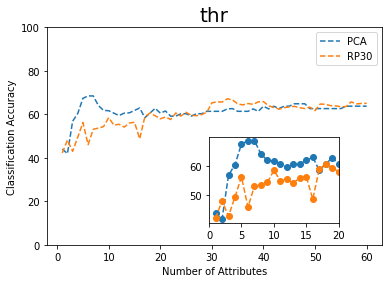

In [ ]:
for filename in ['AI','AMPH1','ATA','COMT','EDC','HIVPR','HIVRT','HPTP','ace','ache','bzr','caco','cox2','cpd-mouse','cpd-rat','gpb','therm','thr']:
    data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    r,c = X.shape
    # number of dimensions as selected as min(noofrows,60)
    noDim = r if r <= 60 else 60
    with open(filename+'accuracy_rp30.pkl','rb') as f:
        error_ratesRP30=pickle.load(f)
    with open(filename+'accuracy_rp.pkl','rb') as f:
        error_ratesRP=pickle.load(f)
    with open(filename+'accuracy_pca.pkl','rb') as f:
        error_ratesPCA=pickle.load(f)
    fig, main_ax = plt.subplots()
    main_ax.plot(range(1,noDim+1), error_ratesPCA,'--',label='PCA')
    main_ax.plot(range(1,noDim+1), error_ratesRP30,'--',label='RP30')
    #main_ax.plot(range(1,noDim+1), error_ratesRP,'--',label='RP')
    main_ax.set_ylim(0,100)
    #main_ax.set_xlim(0, 1)
    #main_ax.set_ylim(1.1 * np.min(s), 2 * np.max(s))
    #main_ax.set_xlabel('time (s)')
    #main_ax.set_ylabel('current (nA)')
    #main_ax.set_title('Gaussian colored noise')
    main_ax.set_title(filename, {'fontsize':20})
    main_ax.set_xlabel('Number of Attributes')
    main_ax.set_ylabel('Classification Accuracy')
    main_ax.legend()

    # this is an inset axes over the main axes
    right_inset_ax = fig.add_axes([.5, .2, .3, .3]) #, facecolor='k')
    right_inset_ax.plot(range(1,noDim+1), error_ratesPCA,'o--')
    right_inset_ax.plot(range(1,noDim+1), error_ratesRP30,'o--')
    #right_inset_ax.plot(range(1,noDim+1), error_ratesRP)

    right_inset_ax.set_xlim(0, 20)
    #right_inset_ax.hist(s, 400, density=True)
    #right_inset_ax.set(title='Probability', xticks=[], yticks=[])
    plt.savefig(filename+'_pcavsrp30.png',dpi=600)
    plt.show()

In [ ]:
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
X = [[0., 0., 1.], [1.,0.,0.], [2.,2.,2.], [2.,5.,4.]]
Y = [[0.1, -0.2], [0.9, 1.1], [6.2, 5.9], [11.9, 12.3]]
pls2 = PLSRegression(n_components=2)
pls2.fit(X, Y)
Y_pred = pls2.predict(X)

In [ ]:
# PLS
import pandas as pd
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
#from sklearn import random_projection
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split
#import pickle
filename='coil100'
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
r,c = X.shape
# number of dimensions as selected as min(noofrows,60)
noDim = r if r <= 60 else 60
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
                 
pcaX = PCA(n_components=noDim).fit(normalizedX)
columns = ['pc_%i' % i for i in range(1,noDim+1)]
df_pca  = pd.DataFrame(pca.transform(X), columns=columns, index=X.index)
clf = neighbors.KNeighborsClassifier()
#kfold = KFold(n_splits=10, random_state=7, shuffle=True)
scores = cross_val_score(clf, pcaX, y,cv=10)#, cv=kfold)
#skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#scores = cross_val_score(clf, pcaX, y, cv=skf)
print(scores.mean()*100.0)

TypeError: ignored

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
print(cross_val_score(lasso, X, y, cv=3))

[0.33150734 0.08022311 0.03531764]


In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

for filename in ['centralnervous']:
    data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    res = dict(zip(X.columns,
                   mutual_info_classif(X, y, discrete_features=True)
                   ))
    X_new=SelectKBest(mutual_info_classif, k=30).fit_transform(X, y)
    dfX_new = pd.DataFrame(X_new)
    res = dict(zip(dfX_new.columns,
                   mutual_info_classif(dfX_new, y, discrete_features=True)
                   ))

print(res)
print(X.shape)
print(X_new.shape)
dfX_new

{0: 0.6243417330159675, 1: 0.6474466390346324, 2: 0.6243417330159675, 3: 0.6243417330159675, 4: 0.6243417330159675, 5: 0.6243417330159675, 6: 0.6243417330159675, 7: 0.6243417330159675, 8: 0.6474466390346323, 9: 0.6474466390346323, 10: 0.555027014959973, 11: 0.6012368269973027, 12: 0.6474466390346324, 13: 0.5463062125638971, 14: 0.6243417330159674, 15: 0.6474466390346324, 16: 0.6243417330159675, 17: 0.6474466390346324, 18: 0.592516024601227, 19: 0.6243417330159675, 20: 0.6474466390346325, 21: 0.6012368269973027, 22: 0.6474466390346324, 23: 0.6474466390346324, 24: 0.6474466390346324, 25: 0.5925160246012269, 26: 0.6012368269973026, 27: 0.6156209306198918, 28: 0.6012368269973025, 29: 0.6474466390346324}
(60, 7129)
(60, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,342,119,37,534,162,109,2768,477,-40,-142,...,259,100,140,2798,102,13,-17,197,1039,397
1,273,273,420,906,1300,600,1585,509,-571,-449,...,414,8,192,1054,80,31,35,62,-150,398
2,694,51,-6,647,696,-48,845,301,82,-39,...,361,26,77,1202,39,-79,11,93,-17,166
3,211,39,127,1119,1155,-106,637,289,-119,35,...,300,-1,82,1523,-128,-14,71,192,-142,220
4,1321,298,781,1137,184,1131,768,260,-641,-165,...,165,273,88,2999,-12,31,133,266,76,921
5,308,57,224,391,446,-18,707,144,259,-149,...,147,97,140,1264,143,47,89,231,-10,617
6,1207,95,173,581,705,-137,739,279,-79,-144,...,142,31,71,1061,-15,53,-11,108,-57,619
7,516,204,114,278,1445,-26,301,298,-93,-83,...,483,97,110,1455,-154,-30,33,20,100,395
8,695,300,395,1290,1059,17,765,301,-566,-436,...,203,23,178,645,-162,-10,-6,137,83,122
9,72,4,16,364,132,-112,317,72,-111,122,...,151,27,17,1089,51,-17,-41,104,-30,90


In [ ]:
r,c = X.shape
noDim = r if r <= 60 else 60
noDim

38

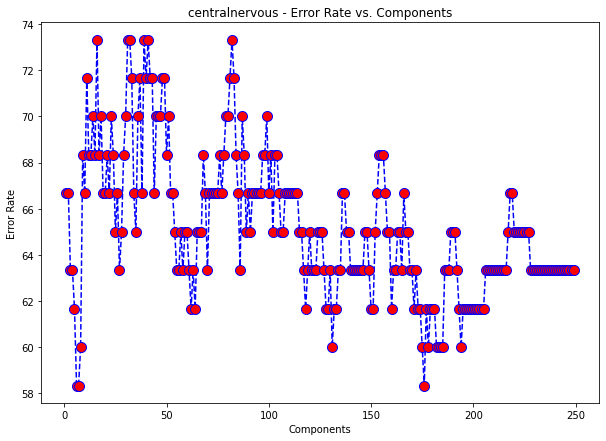

<Figure size 432x288 with 0 Axes>

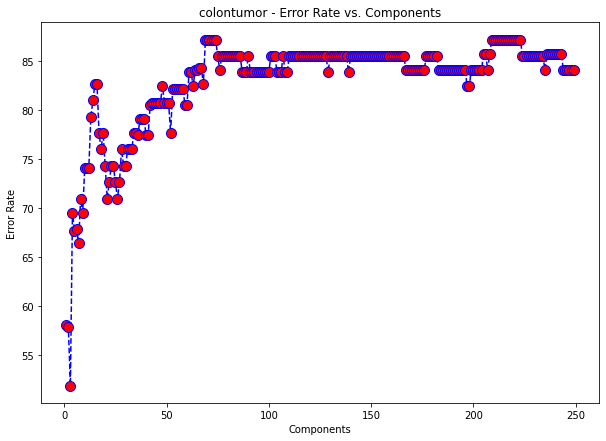

<Figure size 432x288 with 0 Axes>

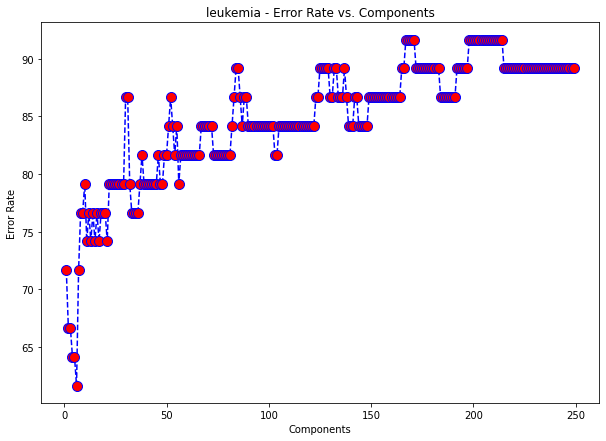

<Figure size 432x288 with 0 Axes>

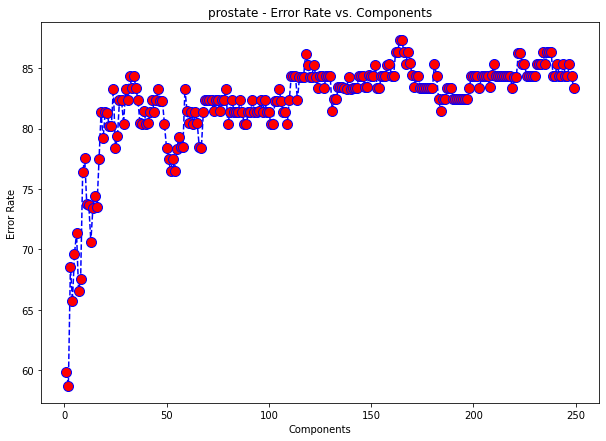

<Figure size 432x288 with 0 Axes>

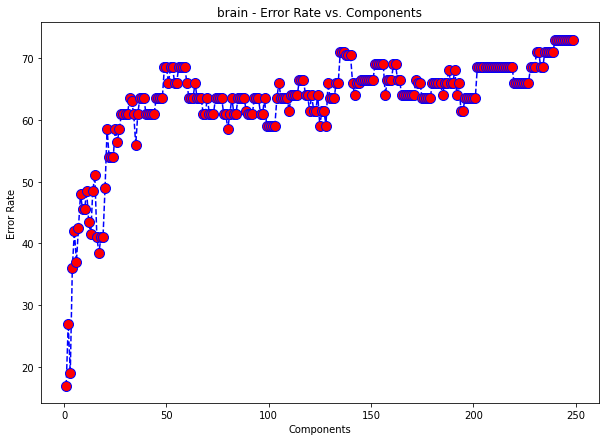

<Figure size 432x288 with 0 Axes>

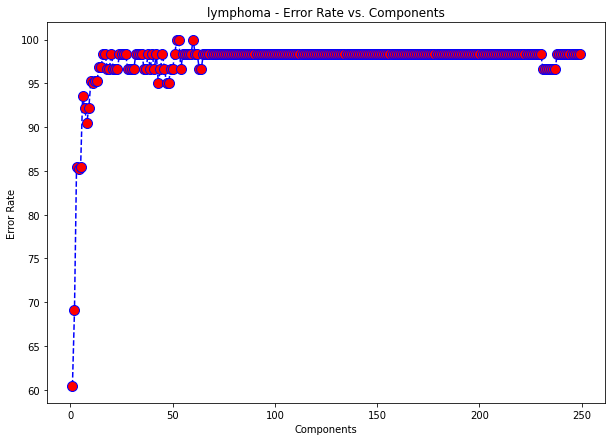

<Figure size 432x288 with 0 Axes>

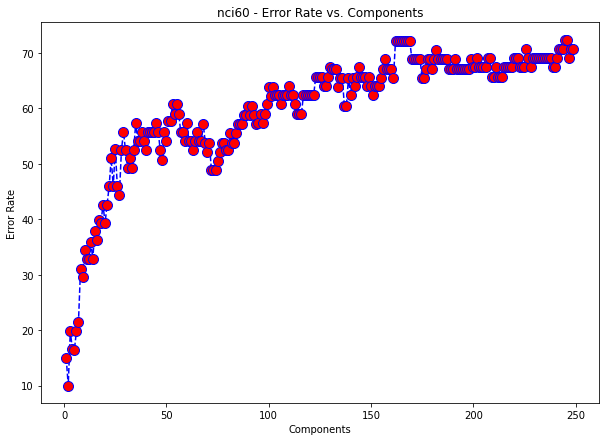

<Figure size 432x288 with 0 Axes>

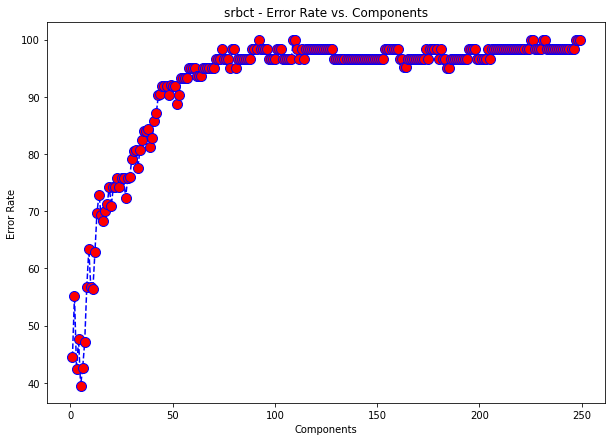

<Figure size 432x288 with 0 Axes>

In [ ]:
# Random Projection
import numpy as np
import matplotlib.pyplot as plt
from sklearn import random_projection

for filename in ['centralnervous','colontumor','leukemia','prostate','brain','lymphoma','nci60','srbct']:
    data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/datasets/'+filename+'/'+filename+'.csv',header=None)
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    scaler = Normalizer().fit(X)
    normalizedX = scaler.transform(X)
    #rp = random_projection.GaussianRandomProjection(n_components='auto')
    #rpX=rp.fit_transform(normalizedX)
    #clf = neighbors.KNeighborsClassifier()
    #kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    #scores = cross_val_score(clf, rpX, y, cv=kfold)
    #print(rpX.shape)
    ##print(y.shape)
    ##print(type(newX))
    error_rates = []

    #for c in range(1, 3510):
    #     rp = random_projection.GaussianRandomProjection(n_components=c)
    #     rpX=rp.fit_transform(normalizedX)
    #     clf = neighbors.KNeighborsClassifier()
    #     kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    #     scores = cross_val_score(clf, rpX, y, cv=kfold)
    #     error_rates.append(scores.mean()*100.0)
    rp = random_projection.GaussianRandomProjection(n_components=250)
    rpXall=rp.fit_transform(normalizedX)
    for c in range(1, 250):
        rpX=rpXall[:,:c]
        clf = neighbors.KNeighborsClassifier()
        kfold = KFold(n_splits=10, random_state=7, shuffle=True)
        scores = cross_val_score(clf, rpX, y, cv=kfold)
        error_rates.append(scores.mean()*100.0)

    plt.figure(figsize=(10, 7))
    plt.plot(range(1,250),error_rates,color='blue', linestyle='dashed', marker='o',
      markerfacecolor='red', markersize=10)
    plt.title(filename+' - Error Rate vs. Components')
    plt.xlabel('Components')
    plt.ylabel('Error Rate')
    #plt.xlim(-10, 80)
    #plt.ylim(0, 0.04)
    plt.show()
    plt.savefig(filename+'_rp.png')

In [ ]:
print(rpXall.shape)

(60, 3510)


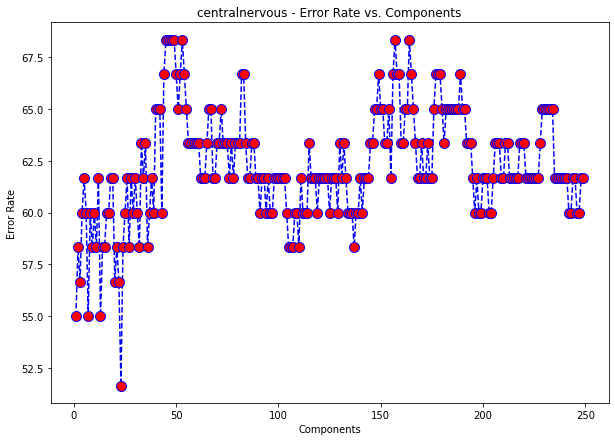

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(range(1,250),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title(filename+' - Error Rate vs. Components')
plt.xlabel('Components')
plt.ylabel('Error Rate')
#plt.xlim(-10, 80)
#plt.ylim(0, 0.04)
plt.show()
plt.savefig(filename+'_rp.png')

In [ ]:
pd.DataFrame(rpXall[:,:2])

,0,1
0,-0.013128,0.003781
1,-0.024750,-0.017827
2,-0.014619,-0.001689
3,-0.014826,-0.005701
4,-0.048125,0.007536
5,-0.015577,0.000717
6,-0.010771,0.009213
7,-0.024518,0.006776
8,-0.016160,-0.002578
9,-0.000797,-0.001846


In [ ]:
from sklearn import random_projection
help(random_projection.GaussianRandomProjection)

Help on class GaussianRandomProjection in module sklearn.random_projection:

class GaussianRandomProjection(BaseRandomProjection)
 |  GaussianRandomProjection(n_components='auto', *, eps=0.1, random_state=None)
 |  
 |  Reduce dimensionality through Gaussian random projection.
 |  
 |  The components of the random matrix are drawn from N(0, 1 / n_components).
 |  
 |  Read more in the :ref:`User Guide <gaussian_random_matrix>`.
 |  
 |  .. versionadded:: 0.13
 |  
 |  Parameters
 |  ----------
 |  n_components : int or 'auto', default='auto'
 |      Dimensionality of the target projection space.
 |  
 |      n_components can be automatically adjusted according to the
 |      number of samples in the dataset and the bound given by the
 |      Johnson-Lindenstrauss lemma. In that case the quality of the
 |      embedding is controlled by the ``eps`` parameter.
 |  
 |      It should be noted that Johnson-Lindenstrauss lemma can yield
 |      very conservative estimated of the required nu

In [ ]:
                 ##print(f'{filename:15s}: {scores.mean()*100.0:.2f}%, ({scores.std()*100.0:.2f}%)')
                 ##dfnormalized = dfnormalized.append({'DataSet':filename,'dfnMean':scores.mean()*100.0,'dfnStd':scores.std()*100.0},ignore_index=True)
#dfnormalized
#scores.mean()*100.0

#X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
#pca = PCA(n_components=2)
#pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

In [ ]:
####

In [ ]:
from sklearn import neighbors
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
clf = neighbors.KNeighborsClassifier()
clf = fit(X,y)
clf.score(X,y)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# normalize/standadize variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.drop('CLASS', axis=1))
sc_transform = scaler.transform(data.drop('CLASS', axis=1))
sc_df = pd.DataFrame(sc_transform)

# Now you can safely use sc_df as your input features.
sc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.308607,0.0,0.0,0.0,-0.661438,-0.213201,5.787918,-0.213201,0.0,0.0,...,-0.121268,0.0,-0.435494,-0.387298,1.622214,0.0,-0.172774,0.0,-0.549442,-0.172774
1,0.308607,0.0,0.0,0.0,-0.661438,-0.213201,-0.172774,-0.213201,0.0,0.0,...,-0.121268,0.0,-0.435494,-0.387298,1.622214,0.0,-0.172774,0.0,-0.549442,-0.172774
2,0.308607,0.0,0.0,0.0,-0.661438,-0.213201,-0.172774,-0.213201,0.0,0.0,...,-0.121268,0.0,-0.435494,-0.387298,1.622214,0.0,-0.172774,0.0,1.820027,-0.172774
3,0.308607,0.0,0.0,0.0,-0.661438,-0.213201,5.787918,-0.213201,0.0,0.0,...,-0.121268,0.0,-0.435494,-0.387298,1.622214,0.0,-0.172774,0.0,-0.549442,-0.172774
4,0.308607,0.0,0.0,0.0,-0.661438,-0.213201,-0.172774,-0.213201,0.0,0.0,...,-0.121268,0.0,-0.435494,-0.387298,1.622214,0.0,-0.172774,0.0,-0.549442,-0.172774


In [ ]:
from sklearn.model_selection import train_test_split

X = sc_transform
y = data['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Text(0, 0.5, 'Error Rate')

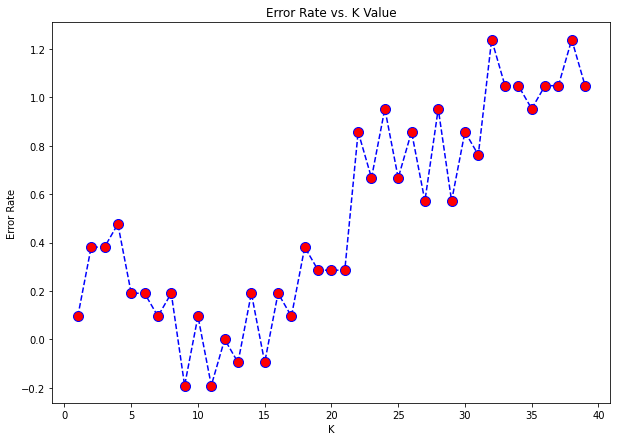

In [ ]:
# Initialize an array that stores the error rates.
from sklearn.neighbors import KNeighborsClassifier

error_rates = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test - preds))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
# Import Data
import pandas as pd
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/datasets/irma/irma.csv', names=['att'+str(i) for i in range(1,1025)]+['CLASS'])
#print(data)
data.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att1016,att1017,att1018,att1019,att1020,att1021,att1022,att1023,att1024,CLASS
0,31.0,12.0,12.0,12.0,12.0,12.0,11.0,8.0,8.0,8.0,...,8.0,8.0,9.0,9.0,10.0,11.0,12.0,13.0,26.0,1
1,112.0,66.0,71.0,61.0,66.0,53.0,57.0,55.0,60.0,53.0,...,30.0,33.0,36.0,40.0,44.0,48.0,56.0,66.0,122.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3.0,1.0,1.0,2.0,3.0,3.0,5.0,5.0,8.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
data['CLASS']

0        1
1        1
2        1
3        1
4        1
        ..
8995    57
8996    57
8997    57
8998    57
8999    57
Name: CLASS, Length: 9000, dtype: int64

Text(0, 0.5, 'Error Rate')

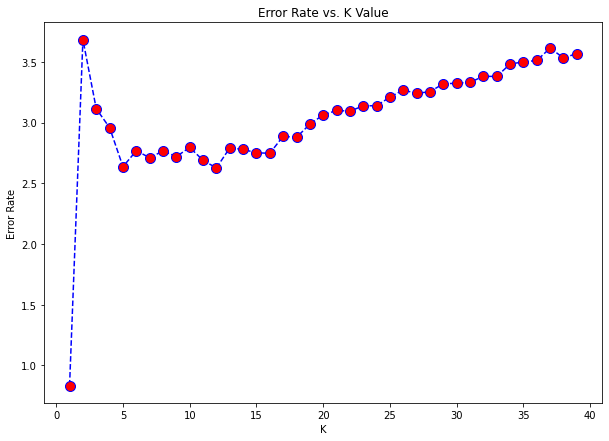

In [ ]:
# Initialize an array that stores the error rates.
from sklearn.neighbors import KNeighborsClassifier

error_rates = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test - preds))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# normalize/standadize variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data.drop('CLASS', axis=1))
sc_transform = scaler.transform(data.drop('CLASS', axis=1))
sc_df = pd.DataFrame(sc_transform)

# Now you can safely use sc_df as your input features.
sc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,-1.033860,-0.963815,-0.971876,-0.998056,-1.026789,-1.045462,-1.065311,-1.102013,-1.095556,-1.084999,...,-1.020451,-1.012536,-1.008361,-0.995371,-0.996535,-0.991959,-0.994077,-0.993115,-0.999848,-1.265598
1,-0.154059,-0.375455,-0.314851,-0.445703,-0.414467,-0.581731,-0.547509,-0.574495,-0.512157,-0.578745,...,-0.801820,-0.772739,-0.737311,-0.703932,-0.664331,-0.630690,-0.604990,-0.535587,-0.457932,-0.274948
2,-1.370574,-1.094562,-1.105508,-1.133326,-1.162860,-1.181189,-1.189133,-1.191803,-1.185310,-1.175000,...,-1.107904,-1.099734,-1.095097,-1.092518,-1.092981,-1.098215,-1.109752,-1.117895,-1.132771,-1.533899
3,-1.337988,-1.083666,-1.094372,-1.110781,-1.128842,-1.147257,-1.132850,-1.135685,-1.095556,-1.073749,...,-1.107904,-1.099734,-1.095097,-1.092518,-1.092981,-1.098215,-1.109752,-1.117895,-1.132771,-1.502941
4,-1.359712,-1.094562,-1.105508,-1.133326,-1.162860,-1.181189,-1.189133,-1.191803,-1.185310,-1.175000,...,-1.107904,-1.099734,-1.095097,-1.092518,-1.092981,-1.098215,-1.109752,-1.117895,-1.132771,-1.533899


In [ ]:
from sklearn.model_selection import train_test_split

X = sc_transform
y = data['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
(680, 1025)
(1005, 1025)
(7200, 1025)
(9000, 1025)
(1360, 1025)
(832, 1025)


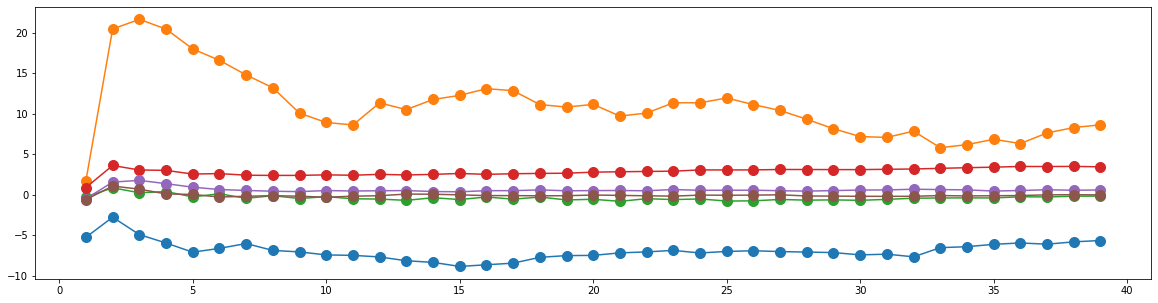

In [ ]:

# Import Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/datasets/irma/irma.csv', names=['att'+str(i) for i in range(1,1025)]+['CLASS'])

#print(data)
#data.head()

# mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive/')

def normalize(data):
  # normalize/standadize variables
  from sklearn.preprocessing import StandardScaler

  scaler = StandardScaler()
  scaler.fit(data.drop('CLASS', axis=1))
  sc_transform = scaler.transform(data.drop('CLASS', axis=1))
  sc_df = pd.DataFrame(sc_transform)
  return sc_transform, sc_df;

# Now you can safely use sc_df as your input features.
#sc_df.head()

plt.figure(figsize=(20, 5))
PATH='/content/gdrive/My Drive/Colab Notebooks/datasets/'
#for i in ['outex','zubud','mias','coil100','irma','17flowers','leedsbutterfly','car']:
for i in ['outex','zubud','coil100','irma','17flowers','leedsbutterfly']:
    data = pd.read_csv(PATH+i+'/'+i+'.csv', names=['att'+str(i) for i in range(1,1025)]+['CLASS'])
    print(data.shape)
    sc_transform, sc_df=normalize(data)
    X = sc_transform
    y = data['CLASS']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    error_rates = []

    for a in range(1, 40):
        k = a
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        error_rates.append(np.mean(y_test - preds))

    #plt.figure(figsize=(10, 7))
    #plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.plot(range(1,40),error_rates,marker='o', markersize=10)
    #plt.title(i+' ' + 'Error Rate vs. K Value')
    #plt.xlabel('K')
    #plt.ylabel('Error Rate')
plt.show()

# Paper 6

In [ ]:
# import necessary libraries
import numpy as np
from sklearn.datasets import load_iris, load_wine
from sklearn.preprocessing import StandardScaler

# define the datasets to use
datasets = [load_iris(), load_wine()]

# define the number of folds for cross-validation
n_folds = 10

# iterate over the datasets
for data in datasets:
    # extract the feature matrix and labels
    X = data.data
    y = data.target
    
    # scale the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # split the data into folds
    folds = np.array_split(X, n_folds)
    labels = np.array_split(y, n_folds)
    
    # create empty lists to store the values
    fishers_discriminant_ratios = []
    inter_intra_ratios = []
    attribute_instance_ratios = []
    
    # iterate over the folds
    for i in range(n_folds):
        # get the test fold
        X_test = folds[i]
        y_test = labels[i]
        
        # concatenate the remaining folds
        X_train = np.concatenate(folds[:i] + folds[i+1:])
        y_train = np.concatenate(labels[:i] + labels[i+1:])
        
        # compute the attribute instance ratio
        attribute_instance_ratios.append(X_test.shape[1] / X_test.shape[0])
        
        # compute the mean and standard deviation of the features
        feature_means = X_train.mean(axis=0)
        feature_stds = X_train.std(axis=0)
        
        # compute the Fisher's discriminant ratio
        fishers_discriminant_ratios.append(np.sum(feature_means ** 2 / feature_stds ** 2))
        
        # compute the inter- and intra-class nearest neighbors
        nearest_neighbors = np.empty((X_test.shape[0], 2))
        for j, sample in enumerate(X_test):
            distances = np.linalg.norm(X_train - sample, axis=1)
            nearest_neighbors[j, 0] = np.min(distances[y_train == y_test[j]])
            nearest_neighbors[j, 1] = np.min(distances[y_train != y_test[j]])
        inter_intra_ratios.append(np.mean(nearest_neighbors[:, 1] / nearest_neighbors[:, 0]))
    
    # print the results
    print(f"Results for {data.DESCR}:")
    print(f"Fisher's discriminant ratio: {np.mean(fishers_discriminant_ratios):.2f} (+/- {np.std(fishers_discriminant_ratios):.3f}")
    print(f"Inter Intra ratio: {np.mean(inter_intra_ratios):.2f} (+/- {np.std(inter_intra_ratios):.3f}")


In [ ]:
#References

#https://www.kdnuggets.com/2020/04/introduction-k-nearest-neighbour-algorithm-using-examples.html


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


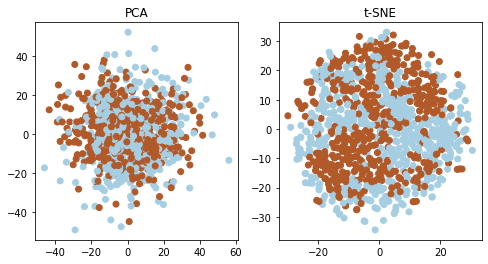

In [ ]:
# PCA and t-SNE for a high-dimensional dataset
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Generate a high-dimensional dataset
X, y = make_classification(n_samples=1000, n_features=100, n_classes=2, n_informative=50)

# Apply PCA and t-SNE to the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Plot the results of PCA and t-SNE
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Paired')
ax[0].set_title("PCA")

ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Paired')
ax[1].set_title("t-SNE")

plt.show()


In [ ]:
!pip install umap-learn

In [ ]:
import umap
help(umap)

Help on package umap:

NAME
    umap

PACKAGE CONTENTS
    aligned_umap
    distances
    layouts
    parametric_umap
    plot
    sparse
    spectral
    umap_
    utils
    validation

FUNCTIONS
    warn(message, category=None, stacklevel=1, source=None)
        Issue a warning, or maybe ignore it or raise an exception.

VERSION
    0.5.3

FILE
    /usr/local/lib/python3.8/dist-packages/umap/__init__.py




In [ ]:
!pip install LargeVis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement LargeVis (from versions: none)
ERROR: No matching distribution found for LargeVis


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:

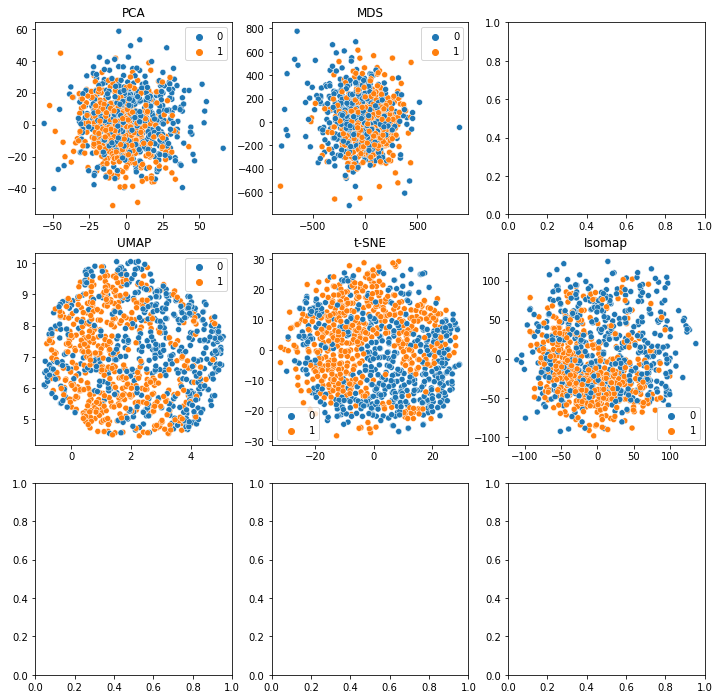

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE, Isomap
from umap import UMAP
#from largevis import LargeVis
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a high-dimensional dataset
X, y = make_classification(n_samples=1000, n_features=100, n_classes=2, n_informative=50)

# Apply different dimensionality reduction techniques to the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

mds = MDS(n_components=2)
X_mds = mds.fit_transform(pairwise_distances(X))

#sammon = SammonMapping(n_components=2)
#X_sammon = sammon.fit_transform(X)

umap = UMAP(n_components=2)
X_umap = umap.fit_transform(X)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

#largevis = LargeVis(n_components=2)
#X_largevis = largevis.fit_transform(X)

#lap_eigenmaps = LaplacianEigenmaps(n_components=2)
#X_lap_eigenmaps = lap_eigenmaps.fit_transform(X)

#diffusion_maps = DiffusionMaps(n_components=2)
#X_diffusion_maps = diffusion_maps.fit_transform(X)


# Plot the results of all dimensionality reduction techniques
fig, ax = plt.subplots(3, 3, figsize=(12, 12))

sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y, ax=ax[0,0])
ax[0,0].set_title("PCA")

sns.scatterplot(X_mds[:, 0], X_mds[:, 1], hue=y, ax=ax[0,1])
ax[0,1].set_title("MDS")

#sns.scatterplot(X_sammon[:, 0], X_sammon[:, 1], hue=y, ax=ax[0,2])
#ax[0,2].set_title("Sammon Mapping")
           
sns.scatterplot(X_umap[:, 0], X_umap[:, 1], hue=y, ax=ax[1,0])
ax[1,0].set_title("UMAP")

sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=y, ax=ax[1,1])
ax[1,1].set_title("t-SNE")

sns.scatterplot(X_isomap[:, 0], X_isomap[:, 1], hue=y, ax=ax[1,2])
ax[1,2].set_title("Isomap")

#sns.scatterplot(X_largevis[:, 0], X_largevis[:, 1], hue=y, ax=ax[2,0])
#ax[2,0].set_title("LargeVis")

#sns.scatterplot(X_eigenmaps[:, 0], X_eigenmaps[:, 1], hue=y, ax=ax[2,1])
#ax[2,1].set_title("Laplacian eigenmaps")

#sns.scatterplot(X_diffusion_mapss[:, 0], X_diffusion_maps[:, 1], hue=y, ax=ax[2,2])
#ax[2,2].set_title("Diffusion maps")

plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA, SparseRandomProjection, FastICA
from sklearn.cross_decomposition import PLSRegression
from sklearn.random_projection import GaussianRandomProjection,johnson_lindenstrauss_min_dim
import matplotlib.pyplot as plt

# Generate a high-dimensional dataset
X, y = make_classification(n_samples=1000, n_features=100, n_classes=2, n_informative=50)

# Apply PCA and PLS to the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pls = PLSRegression(n_components=2)
X_pls = pls.fit_transform(X, y)

# apply Random Projection
transformer = GaussianRandomProjection(n_components=2)
X_rp = transformer.fit_transform(X)

# apply Random Subset
n_components = johnson_lindenstrauss_min_dim(n_samples=X.shape[0], eps=0.5)
transformer = SparseRandomProjection(n_components=n_components)
X_rs = transformer.fit_transform(X)

# Plot the results of all dimensionality reduction techniques
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

ax[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Paired')
ax[0, 0].set_title("PCA")

ax[0, 1].scatter(X_pls[:, 0], X_pls[:, 1], c=y, cmap='Paired')
ax[0, 1].set_title("PLS")

ax[1, 0].scatter(X_rp[:, 0], X_rp[:, 1], c=y, cmap='Paired')
ax[1, 0].set_title("Random Projection")

ax[1, 1].scatter(X_rs[:, 0], X_rs[:, 1], c=y, cmap='Paired')
ax[1, 1].set_title("Random Subset")

plt.show()


ImportError: ignored